In [214]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("ticks")

In [2]:
df = pd.read_csv('../data/feature_eng_data.csv')

In [3]:
df.head()

,date,home_team,away_team,ht_score,ft_score,firsthalf_home_goals,firsthalf_away_goals,secondhalf_home_goals,secondhalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,secondhalf_result,result
0,Sat Aug 8 2015,Bournemouth,Aston Villa,0-0,0-1,0,0,0,1,0,1,Draw,Aston Villa,Aston Villa
1,Sat Aug 8 2015,Chelsea,Swansea,2-1,2-2,2,1,0,1,2,2,Chelsea,Swansea,Draw
2,Sat Aug 8 2015,Everton,Watford,0-1,2-2,0,1,2,1,2,2,Watford,Everton,Draw
3,Sat Aug 8 2015,Leicester,Sunderland,3-0,4-2,3,0,1,2,4,2,Leicester,Sunderland,Leicester
4,Sat Aug 8 2015,Man United,Tottenham,1-0,1-0,1,0,0,0,1,0,Man United,Draw,Man United


In [4]:
df['home_team'].value_counts()

Arsenal             91
Chelsea             91
Crystal Palace      91
Southampton         91
Man United          91
Liverpool           91
Leicester           91
Watford             90
Everton             90
Bournemouth         90
Tottenham           90
West Ham            90
Man City            89
Burnley             72
Newcastle           71
West Brom           57
Swansea             57
Stoke               57
Brighton            52
Huddersfield        38
Sunderland          38
Wolves              34
Norwich             33
Aston Villa         32
Middlesbrough       19
Fulham              19
Cardiff             19
Hull                19
Sheffield United    15
Name: home_team, dtype: int64

In [5]:
df['away_team'].value_counts()

West Ham            91
Man City            91
Bournemouth         91
Tottenham           91
Watford             91
Everton             91
Crystal Palace      90
Southampton         90
Liverpool           90
Man United          90
Chelsea             90
Leicester           90
Arsenal             89
Newcastle           72
Burnley             71
West Brom           57
Swansea             57
Stoke               57
Brighton            53
Huddersfield        38
Sunderland          38
Aston Villa         34
Norwich             34
Wolves              33
Middlesbrough       19
Fulham              19
Cardiff             19
Hull                19
Sheffield United    13
Name: away_team, dtype: int64

In [88]:
df_home_goals = pd.DataFrame({'home_goals' : df.groupby("home_team")['total_home_goals'].sum()}).reset_index()
df_away_goals = pd.DataFrame({'away_goals' : df.groupby("away_team")['total_away_goals'].sum()}).reset_index()

df_goals_scored = pd.concat([df_home_goals, df_away_goals], axis=1)
df_goals_scored['goals'] = df_goals_scored['home_goals'] + df_goals_scored['away_goals']
df_goals_scored = df_goals_scored.drop(columns=['away_team', 'home_goals', 'away_goals'])
df_goals_scored = df_goals_scored.rename(columns={'home_team': 'team'})

df_goals_scored

,team,goals
0,Arsenal,329
1,Aston Villa,61
2,Bournemouth,230
3,Brighton,101
4,Burnley,154
5,Cardiff,34
6,Chelsea,320
7,Crystal Palace,211
8,Everton,256
9,Fulham,34


In [89]:
df_goals_scored_top_10 = df_goals_scored.sort_values(by='goals', ascending=False)
df_goals_scored_top_10 = df_goals_scored_top_10[:10]
df_goals_scored_top_10

,team,goals
14,Man City,420
13,Liverpool,380
24,Tottenham,343
0,Arsenal,329
6,Chelsea,320
12,Leicester,281
15,Man United,280
8,Everton,256
27,West Ham,247
2,Bournemouth,230


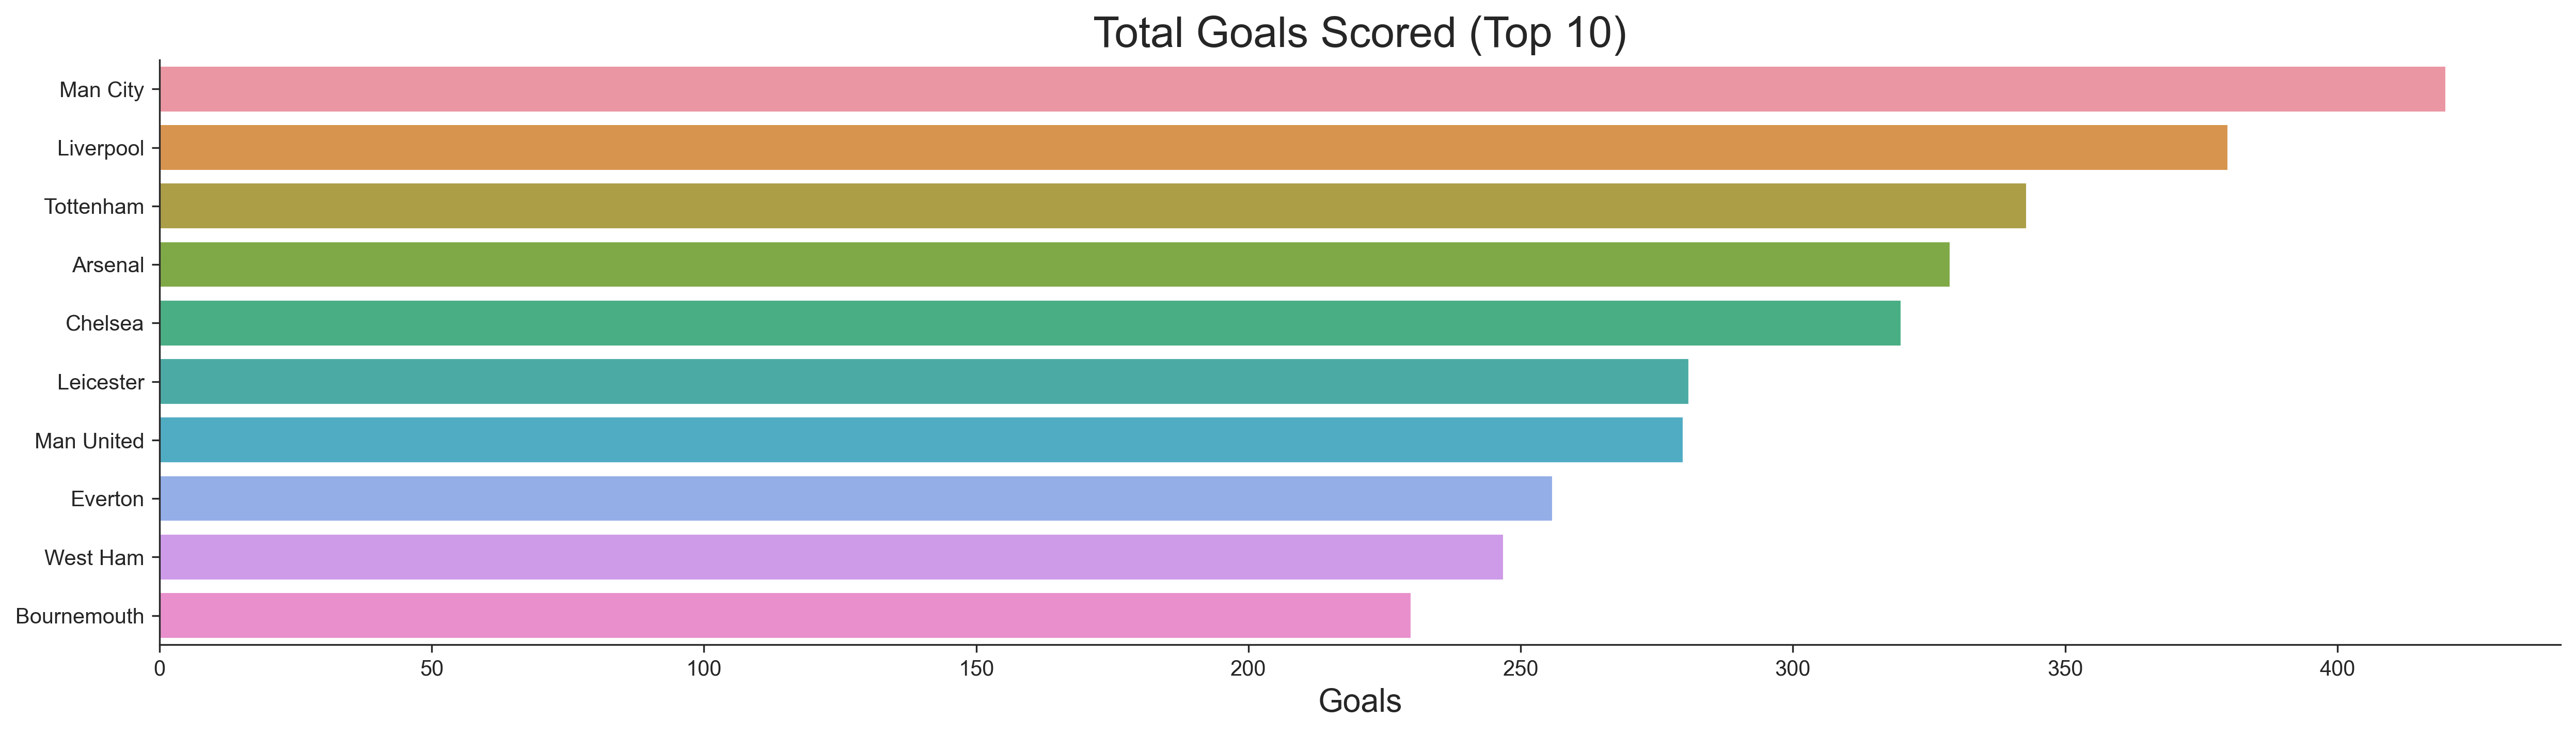

In [215]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_scored_top_10,
           x='goals',
           y='team')
plt.xlabel('Goals', fontsize=15)
plt.ylabel('')
plt.title('Total Goals Scored (Top 10)', fontsize=20)
sns.despine(top=True);

In [92]:
df_goals_scored_bottom_10 = df_goals_scored.sort_values(by='goals')
df_goals_scored_bottom_10 = df_goals_scored_bottom_10[:10]
df_goals_scored_bottom_10

,team,goals
16,Middlesbrough,27
19,Sheffield United,30
5,Cardiff,34
9,Fulham,34
11,Hull,37
10,Huddersfield,50
1,Aston Villa,61
18,Norwich,64
22,Sunderland,77
28,Wolves,88


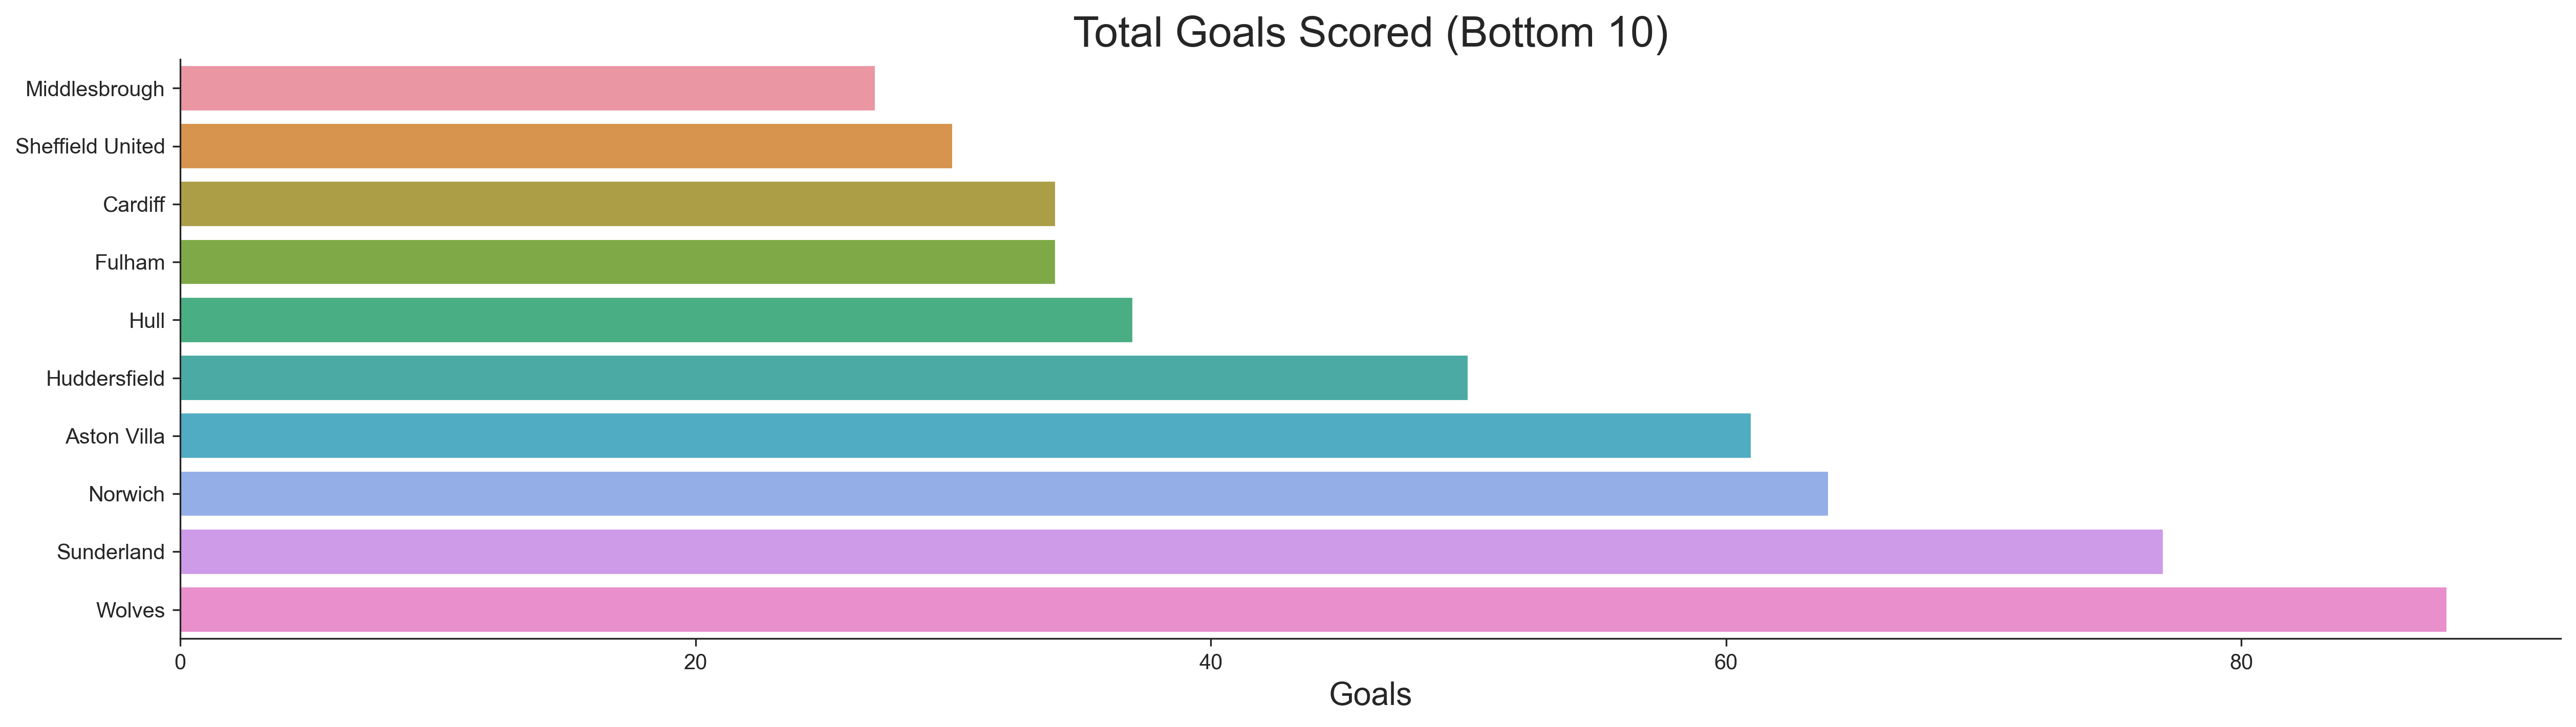

In [216]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_scored_bottom_10,
           x='goals',
           y='team')
plt.xlabel('Goals', fontsize=15)
plt.ylabel('')
plt.title('Total Goals Scored (Bottom 10)', fontsize=20)
sns.despine(top=True);

In [100]:
df_home_goals_firsthalf = pd.DataFrame({'firsthalf_home_goals' : df.groupby("home_team")['firsthalf_home_goals'].sum()}).reset_index()
df_away_goals_firsthalf = pd.DataFrame({'firsthalf_away_goals' : df.groupby("away_team")['firsthalf_away_goals'].sum()}).reset_index()

df_goals_scored_firsthalf = pd.concat([df_home_goals_firsthalf, df_away_goals_firsthalf], axis=1)
df_goals_scored_firsthalf['goals'] = df_goals_scored_firsthalf['firsthalf_home_goals'] + df_goals_scored_firsthalf['firsthalf_away_goals']
df_goals_scored_firsthalf = df_goals_scored_firsthalf.drop(columns=['away_team', 'firsthalf_home_goals', 'firsthalf_away_goals'])
df_goals_scored_firsthalf = df_goals_scored_firsthalf.rename(columns={'home_team': 'team'})

df_goals_scored_firsthalf_top_10 = df_goals_scored_firsthalf.sort_values(by='goals', ascending=False)
df_goals_scored_firsthalf_top_10 = df_goals_scored_firsthalf_top_10[:10]

df_goals_scored_firsthalf_bottom_10 = df_goals_scored_firsthalf.sort_values(by='goals')
df_goals_scored_firsthalf_bottom_10 = df_goals_scored_firsthalf_bottom_10[:10]

print(df_goals_scored_firsthalf_top_10)
print()
print(df_goals_scored_firsthalf_bottom_10)

           team  goals
14     Man City    193
13    Liverpool    174
6       Chelsea    149
24    Tottenham    149
0       Arsenal    137
15   Man United    136
8       Everton    116
12    Leicester    114
2   Bournemouth    110
27     West Ham    106

                team  goals
11              Hull     11
5            Cardiff     11
19  Sheffield United     12
16     Middlesbrough     15
9             Fulham     15
1        Aston Villa     24
10      Huddersfield     26
18           Norwich     29
22        Sunderland     29
28            Wolves     29


In [101]:
df_home_goals_secondhalf = pd.DataFrame({'secondhalf_home_goals' : df.groupby("home_team")['secondhalf_home_goals'].sum()}).reset_index()
df_away_goals_secondhalf = pd.DataFrame({'secondhalf_away_goals' : df.groupby("away_team")['secondhalf_away_goals'].sum()}).reset_index()

df_goals_scored_secondhalf = pd.concat([df_home_goals_secondhalf, df_away_goals_secondhalf], axis=1)
df_goals_scored_secondhalf['goals'] = df_goals_scored_secondhalf['secondhalf_home_goals'] + df_goals_scored_secondhalf['secondhalf_away_goals']
df_goals_scored_secondhalf = df_goals_scored_secondhalf.drop(columns=['away_team', 'secondhalf_home_goals', 'secondhalf_away_goals'])
df_goals_scored_secondhalf = df_goals_scored_secondhalf.rename(columns={'home_team': 'team'})

df_goals_scored_secondhalf_top_10 = df_goals_scored_secondhalf.sort_values(by='goals', ascending=False)
df_goals_scored_secondhalf_top_10 = df_goals_scored_secondhalf_top_10[:10]

df_goals_scored_secondhalf_bottom_10 = df_goals_scored_secondhalf.sort_values(by='goals')
df_goals_scored_secondhalf_bottom_10 = df_goals_scored_secondhalf_bottom_10[:10]

print(df_goals_scored_secondhalf_top_10)
print()
print(df_goals_scored_secondhalf_bottom_10)

              team  goals
14        Man City    227
13       Liverpool    206
24       Tottenham    194
0          Arsenal    192
6          Chelsea    171
12       Leicester    167
15      Man United    144
27        West Ham    141
8          Everton    140
7   Crystal Palace    136

                team  goals
16     Middlesbrough     12
19  Sheffield United     18
9             Fulham     19
5            Cardiff     23
10      Huddersfield     24
11              Hull     26
18           Norwich     35
1        Aston Villa     37
22        Sunderland     48
3           Brighton     56


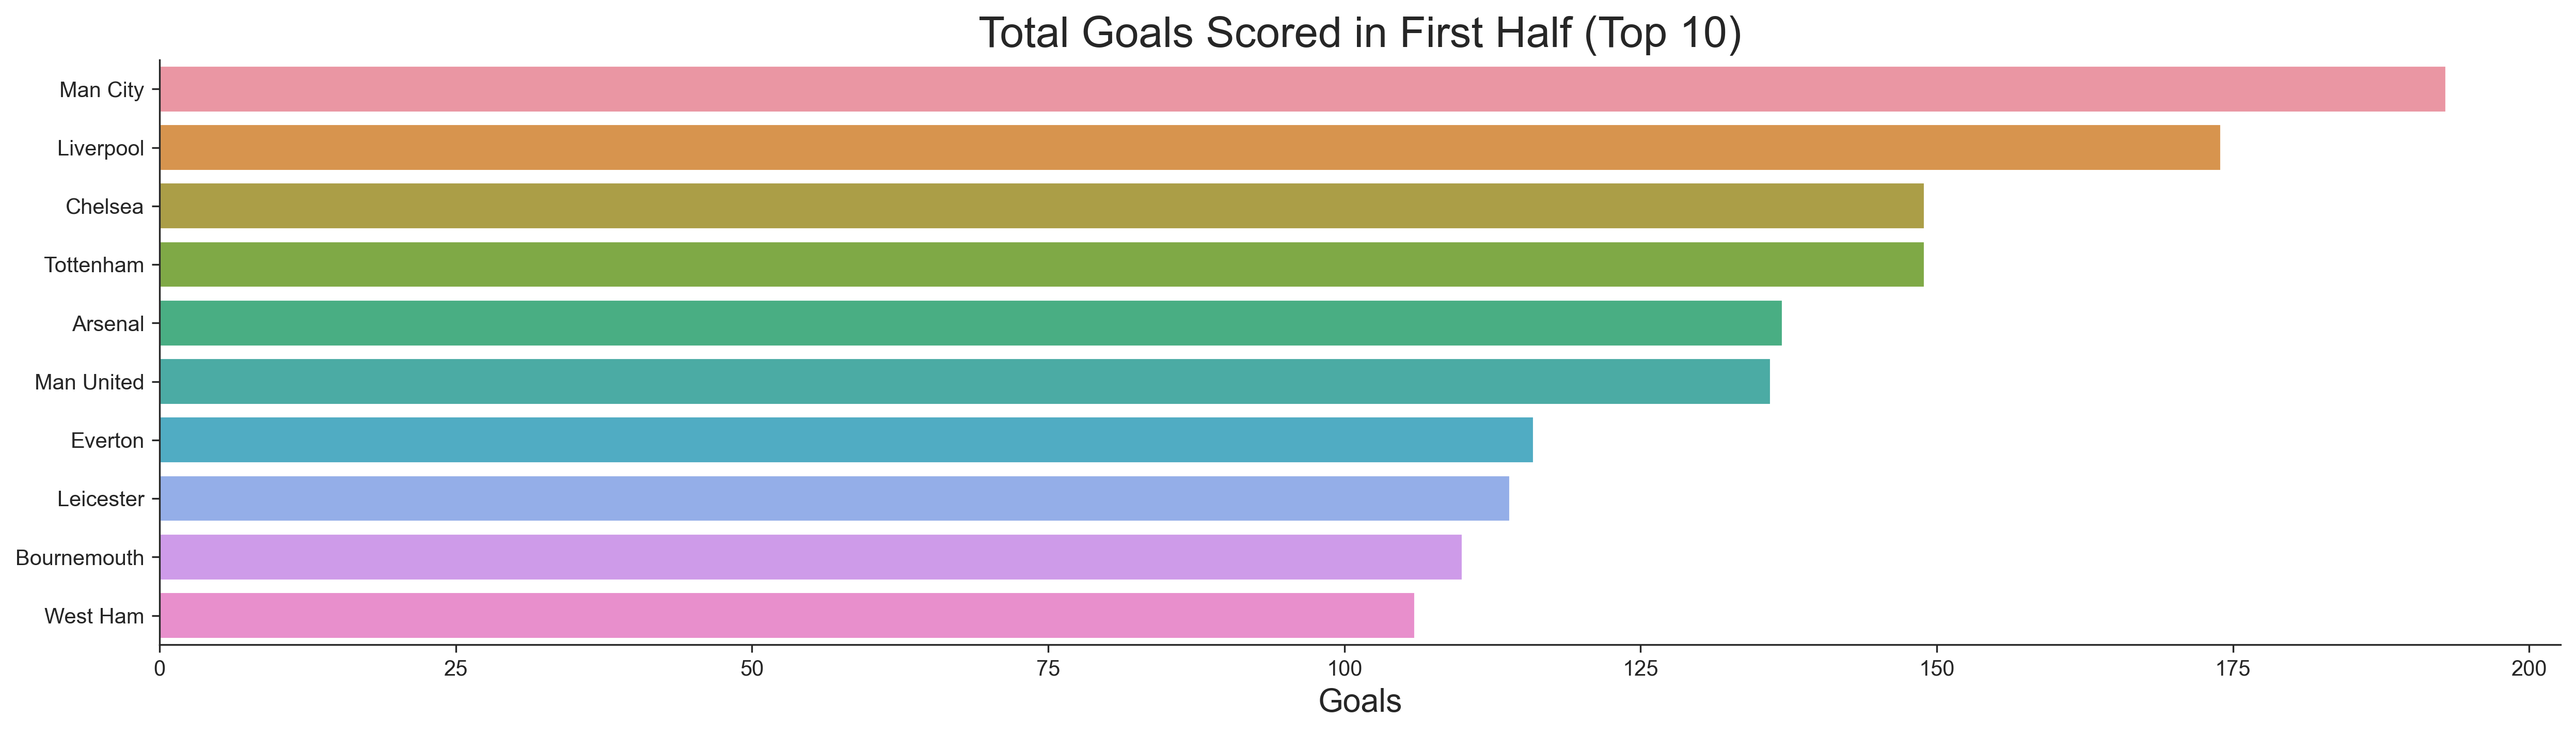

In [217]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_scored_firsthalf_top_10,
           x='goals',
           y='team')
plt.xlabel('Goals', fontsize=15)
plt.ylabel('')
plt.title('Total Goals Scored in First Half (Top 10)', fontsize=20)
sns.despine(top=True);

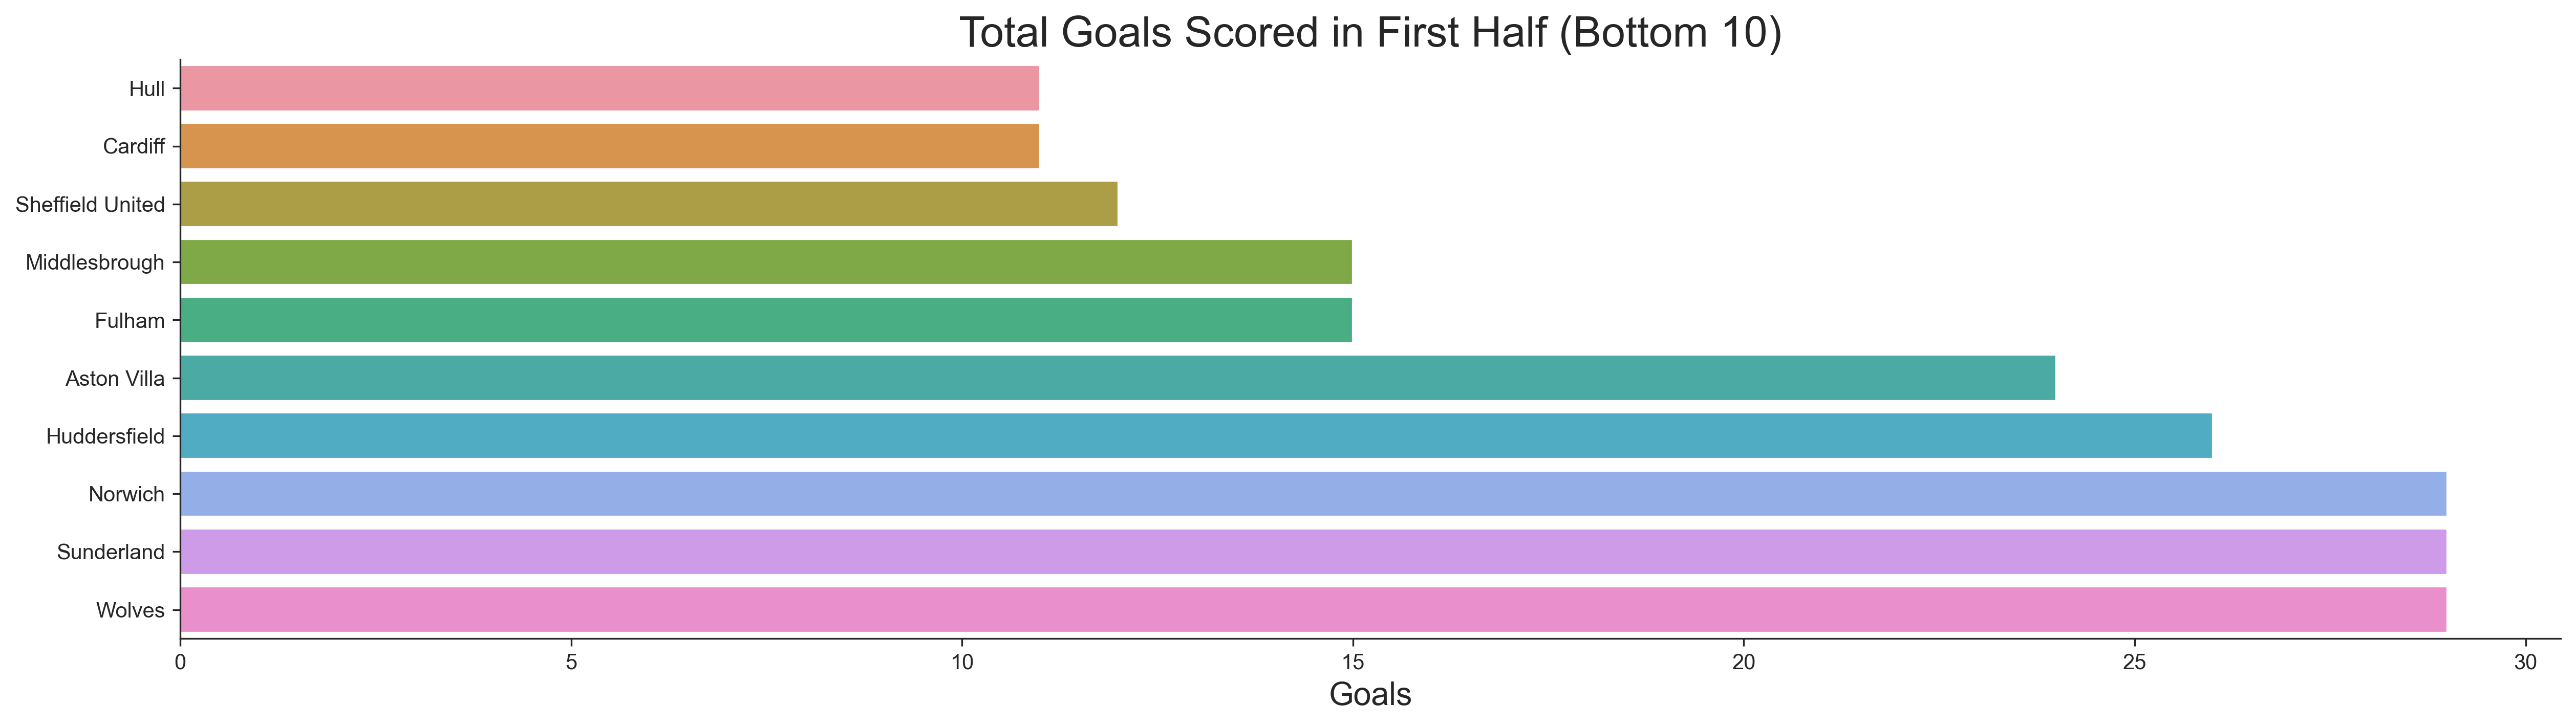

In [218]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_scored_firsthalf_bottom_10,
           x='goals',
           y='team')
plt.xlabel('Goals', fontsize=15)
plt.ylabel('')
plt.title('Total Goals Scored in First Half (Bottom 10)', fontsize=20)
sns.despine(top=True);

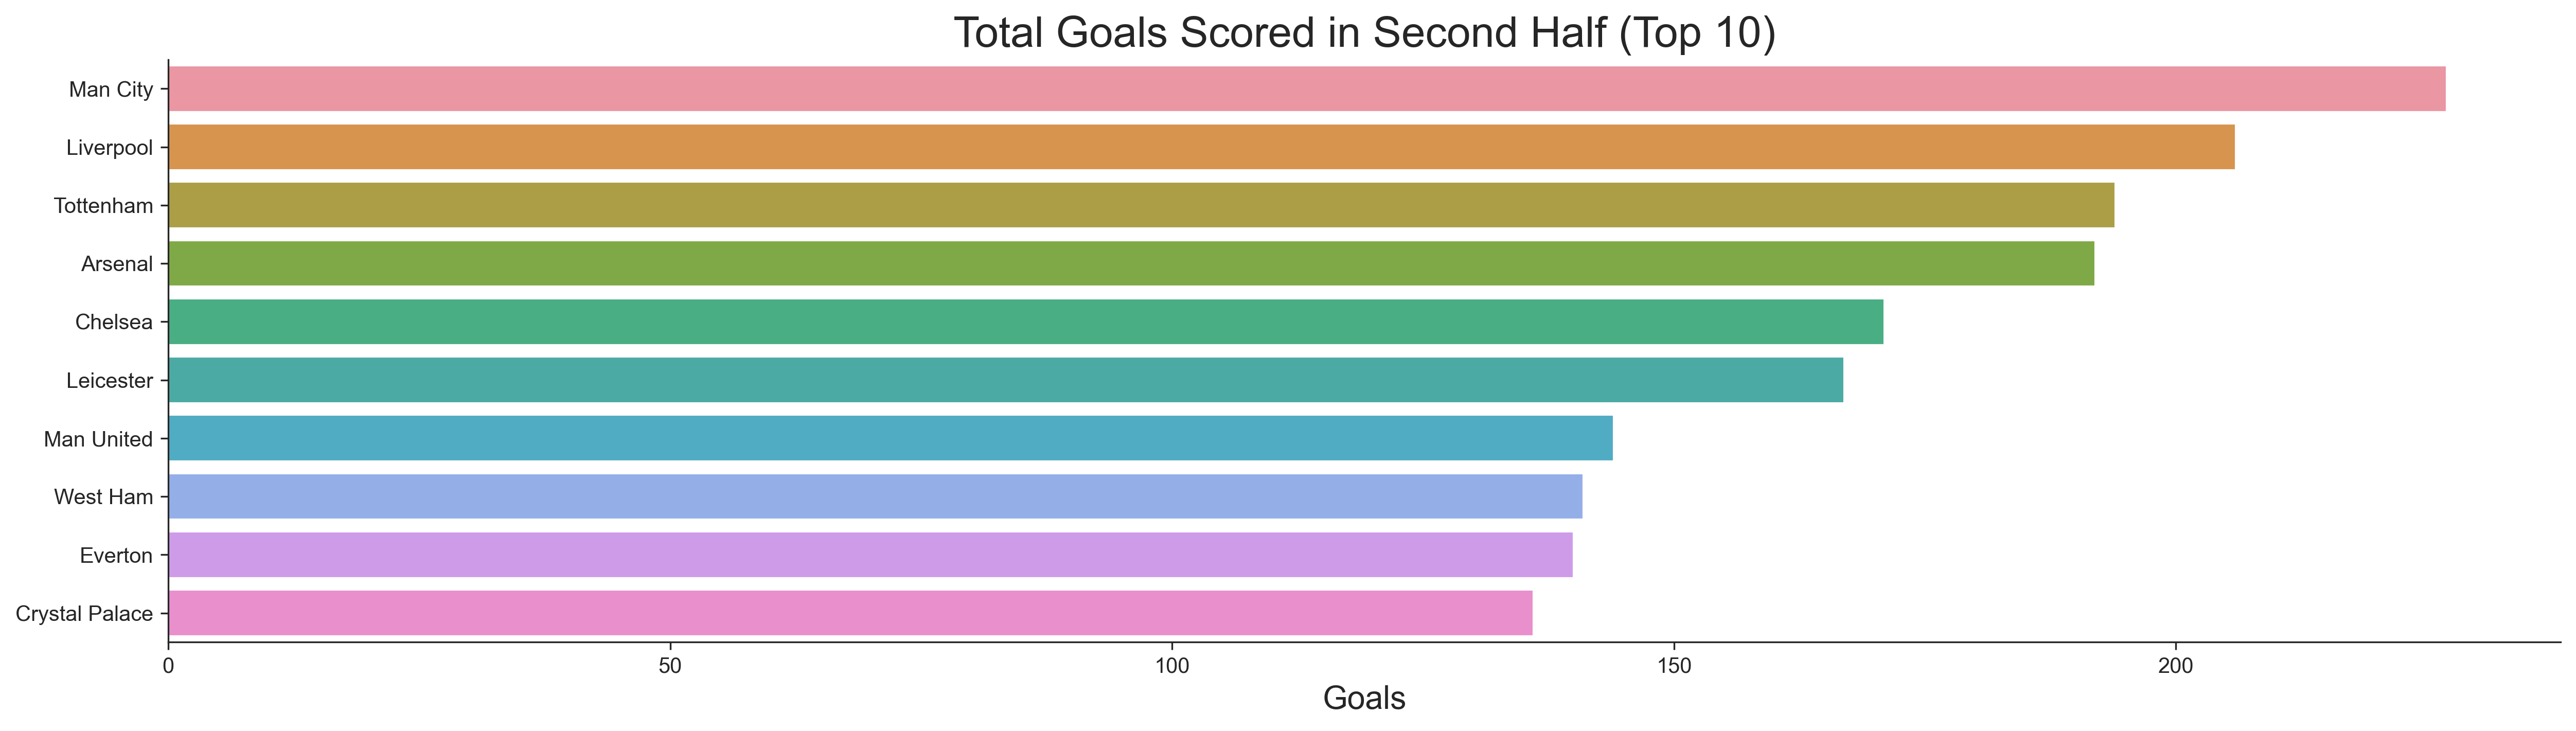

In [219]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_scored_secondhalf_top_10,
           x='goals',
           y='team')
plt.xlabel('Goals', fontsize=15)
plt.ylabel('')
plt.title('Total Goals Scored in Second Half (Top 10)', fontsize=20)
sns.despine(top=True);

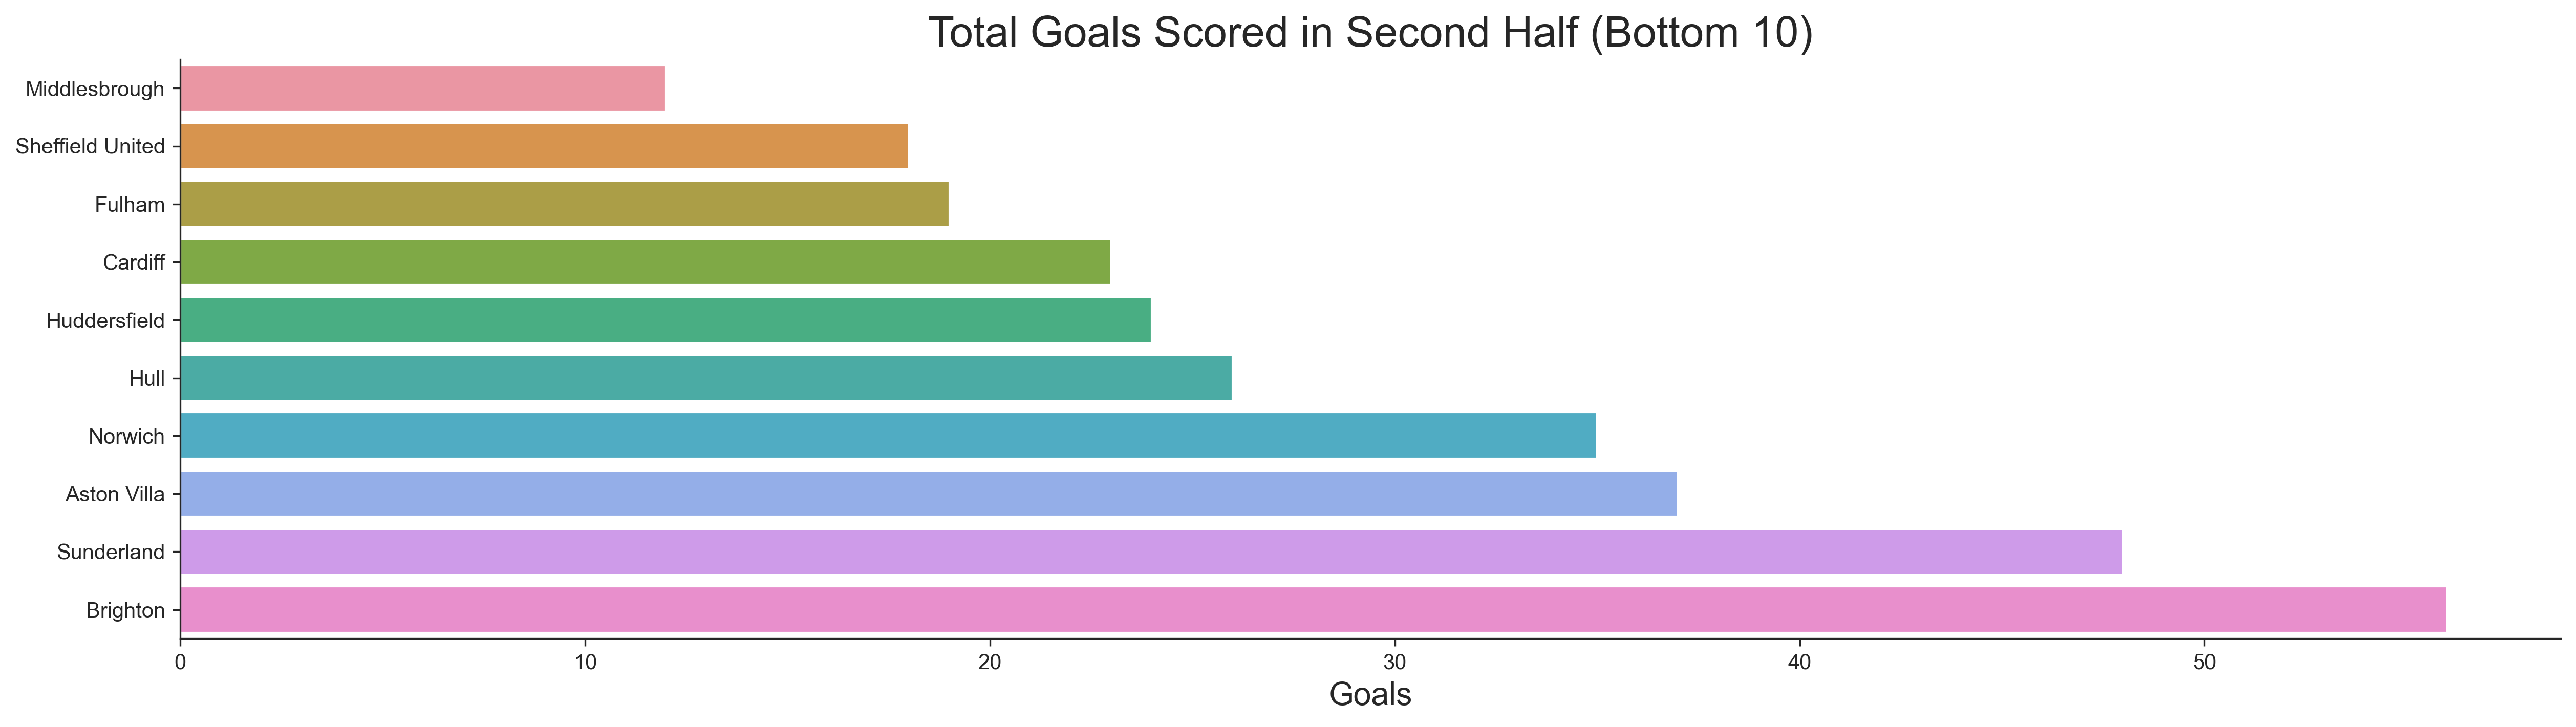

In [220]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_scored_secondhalf_bottom_10,
           x='goals',
           y='team')
plt.xlabel('Goals', fontsize=15)
plt.ylabel('')
plt.title('Total Goals Scored in Second Half (Bottom 10)', fontsize=20)
sns.despine(top=True);

In [221]:
df_games_1 = pd.DataFrame({'home_games' : df.groupby("home_team")['home_team'].count()}).reset_index()
df_games_2 = pd.DataFrame({'away_games' : df.groupby("away_team")['away_team'].count()}).reset_index()

df_games = pd.concat([df_games_1, df_games_2], axis=1)
df_games['games'] = df_games_1['home_games'] + df_games_2['away_games']
df_games = df_games.drop(columns=['away_team', 'home_games', 'away_games'])
df_games = df_games.rename(columns={'home_team': 'team_'})

print(df_games)

               team_  games
0            Arsenal    180
1        Aston Villa     66
2        Bournemouth    181
3           Brighton    105
4            Burnley    143
5            Cardiff     38
6            Chelsea    181
7     Crystal Palace    181
8            Everton    181
9             Fulham     38
10      Huddersfield     76
11              Hull     38
12         Leicester    181
13         Liverpool    181
14          Man City    180
15        Man United    181
16     Middlesbrough     38
17         Newcastle    143
18           Norwich     67
19  Sheffield United     28
20       Southampton    181
21             Stoke    114
22        Sunderland     76
23           Swansea    114
24         Tottenham    181
25           Watford    181
26         West Brom    114
27          West Ham    181
28            Wolves     67


In [222]:
df_goals_per_game = pd.concat([df_goals_scored, df_games], axis=1)
df_goals_per_game['goals_per_game'] = df_goals_per_game['goals'] / df_goals_per_game['games']
df_goals_per_game = df_goals_per_game.drop(columns=['team_'])
df_goals_per_game_filter = df_goals_per_game[df_goals_per_game['games'] >= df_goals_per_game['games'].mean()]
df_goals_per_game_filter = df_goals_per_game_filter.sort_values(by='goals_per_game', ascending=False)
df_goals_per_game_filter


,team,goals,games,goals_per_game
14,Man City,420,180,2.333333
13,Liverpool,380,181,2.099448
24,Tottenham,343,181,1.895028
0,Arsenal,329,180,1.827778
6,Chelsea,320,181,1.767956
12,Leicester,281,181,1.552486
15,Man United,280,181,1.546961
8,Everton,256,181,1.414365
27,West Ham,247,181,1.364641
2,Bournemouth,230,181,1.270718


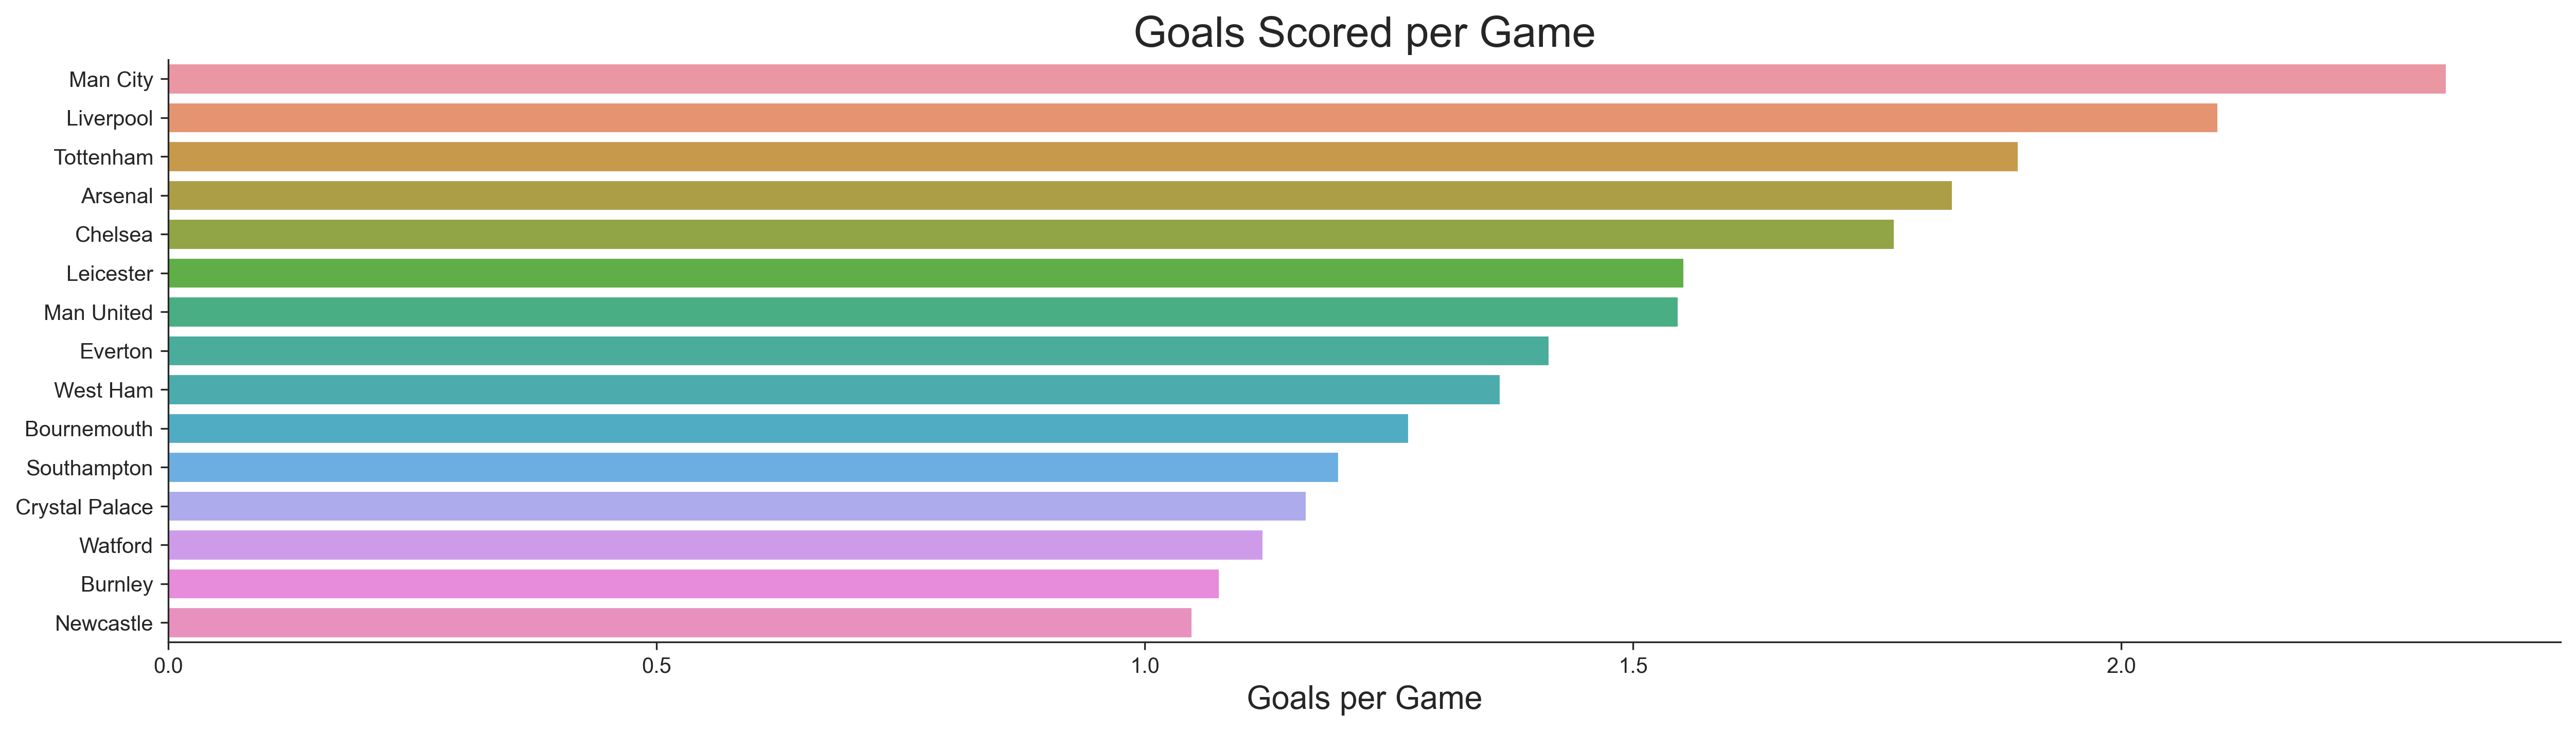

In [223]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_per_game_filter,
           x='goals_per_game',
           y='team')
plt.xlabel('Goals per Game', fontsize=15)
plt.ylabel('')
plt.title('Goals Scored per Game', fontsize=20)
sns.despine(top=True);

In [224]:
df_home_goals_conceded = pd.DataFrame({'home_goals_conceded' : df.groupby("home_team")['total_away_goals'].sum()}).reset_index()
df_away_goals_conceded = pd.DataFrame({'away_goals_conceded' : df.groupby("away_team")['total_home_goals'].sum()}).reset_index()

df_goals_conceded_scored = pd.concat([df_home_goals_conceded, df_away_goals_conceded], axis=1)
df_goals_conceded_scored['goals_conceded'] = df_goals_conceded_scored['home_goals_conceded'] + df_goals_conceded_scored['away_goals_conceded']
df_goals_conceded_scored = df_goals_conceded_scored.drop(columns=['away_team', 'home_goals_conceded', 'away_goals_conceded'])
df_goals_conceded_scored = df_goals_conceded_scored.rename(columns={'home_team': 'team'})

df_goals_conceded_scored

,team,goals_conceded
0,Arsenal,218
1,Aston Villa,132
2,Bournemouth,312
3,Brighton,154
4,Burnley,202
5,Cardiff,69
6,Chelsea,202
7,Crystal Palace,254
8,Everton,249
9,Fulham,81


In [225]:
df_goals_conceded_per_game = pd.concat([df_goals_conceded_scored, df_games], axis=1)
df_goals_conceded_per_game['goals_conceded_per_game'] = df_goals_conceded_per_game['goals_conceded'] / df_goals_per_game['games']
df_goals_conceded_per_game = df_goals_conceded_per_game.drop(columns=['team_'])
df_goals_conceded_per_game_filter = df_goals_conceded_per_game[df_goals_conceded_per_game['games'] >= df_goals_conceded_per_game['games'].mean()]
df_goals_conceded_per_game_filter = df_goals_conceded_per_game_filter.sort_values(by='goals_conceded_per_game')
df_goals_conceded_per_game_filter

,team,goals_conceded,games,goals_conceded_per_game
14,Man City,161,180,0.894444
13,Liverpool,173,181,0.955801
15,Man United,176,181,0.972376
24,Tottenham,176,181,0.972376
6,Chelsea,202,181,1.116022
0,Arsenal,218,180,1.211111
12,Leicester,235,181,1.298343
8,Everton,249,181,1.375691
7,Crystal Palace,254,181,1.403315
17,Newcastle,201,143,1.405594


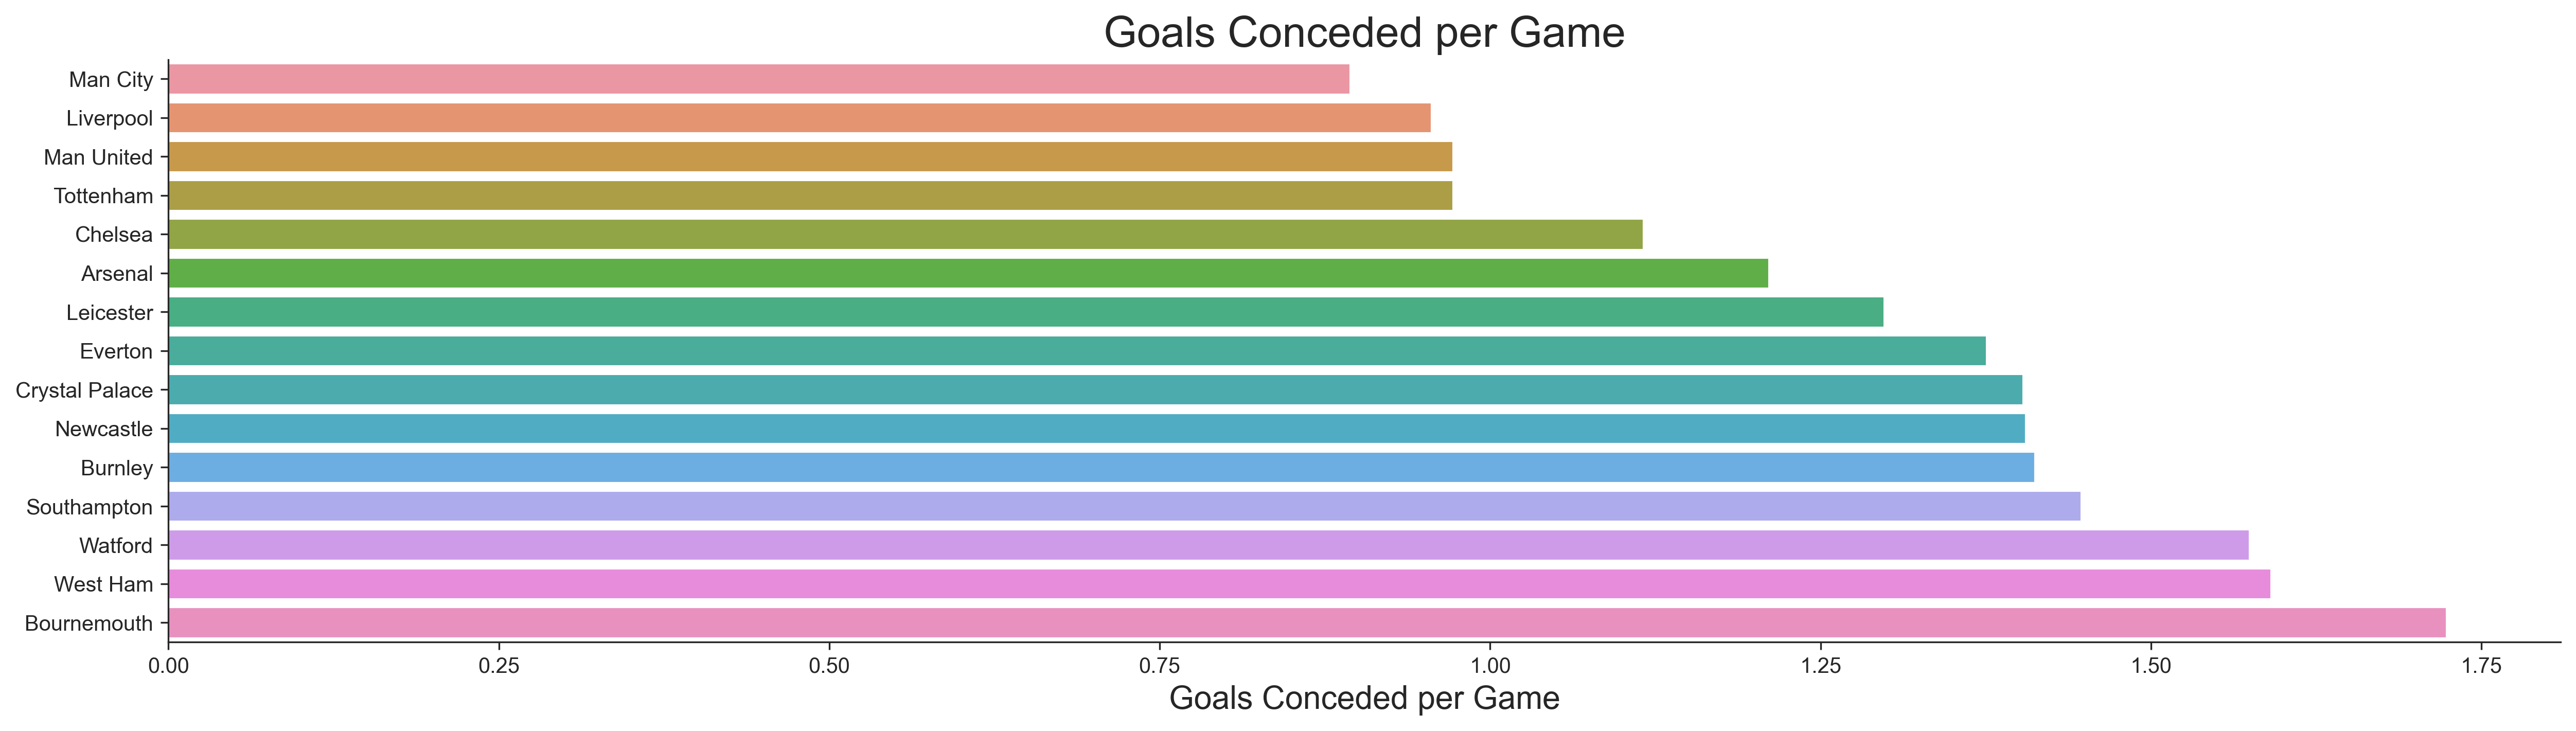

In [226]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_conceded_per_game_filter,
           x='goals_conceded_per_game',
           y='team')
plt.xlabel('Goals Conceded per Game', fontsize=15)
plt.ylabel('')
plt.title('Goals Conceded per Game', fontsize=20)
sns.despine(top=True);

In [227]:
df_home_goals_conceded_firsthalf = pd.DataFrame({'home_goals_conceded_firsthalf' : df.groupby("home_team")['firsthalf_away_goals'].sum()}).reset_index()
df_away_goals_conceded_firsthalf = pd.DataFrame({'away_goals_conceded_firsthalf' : df.groupby("away_team")['firsthalf_home_goals'].sum()}).reset_index()

df_goals_conceded_firsthalf = pd.concat([df_home_goals_conceded_firsthalf, df_away_goals_conceded_firsthalf], axis=1)
df_goals_conceded_firsthalf['goals_conceded_firsthalf'] = df_goals_conceded_firsthalf['home_goals_conceded_firsthalf'] + df_goals_conceded_firsthalf['away_goals_conceded_firsthalf']
df_goals_conceded_firsthalf = df_goals_conceded_firsthalf.drop(columns=['away_team', 'home_goals_conceded_firsthalf', 'away_goals_conceded_firsthalf'])
df_goals_conceded_firsthalf = df_goals_conceded_firsthalf.rename(columns={'home_team': 'team'})

df_home_goals_conceded_secondhalf = pd.DataFrame({'home_goals_conceded_secondhalf' : df.groupby("home_team")['secondhalf_away_goals'].sum()}).reset_index()
df_away_goals_conceded_secondhalf = pd.DataFrame({'away_goals_conceded_secondhalf' : df.groupby("away_team")['secondhalf_home_goals'].sum()}).reset_index()

df_goals_conceded_secondhalf = pd.concat([df_home_goals_conceded_secondhalf, df_away_goals_conceded_secondhalf], axis=1)
df_goals_conceded_secondhalf['goals_conceded_secondhalf'] = df_goals_conceded_secondhalf['home_goals_conceded_secondhalf'] + df_goals_conceded_secondhalf['away_goals_conceded_secondhalf']
df_goals_conceded_secondhalf = df_goals_conceded_secondhalf.drop(columns=['away_team', 'home_goals_conceded_secondhalf', 'away_goals_conceded_secondhalf'])
df_goals_conceded_secondhalf = df_goals_conceded_secondhalf.rename(columns={'home_team': 'team'})

print(df_goals_conceded_firsthalf)
print()
print(df_goals_conceded_secondhalf)

                team  goals_conceded_firsthalf
0            Arsenal                       106
1        Aston Villa                        54
2        Bournemouth                       148
3           Brighton                        69
4            Burnley                        84
5            Cardiff                        30
6            Chelsea                        82
7     Crystal Palace                       105
8            Everton                       109
9             Fulham                        41
10      Huddersfield                        57
11              Hull                        28
12         Leicester                       113
13         Liverpool                        74
14          Man City                        78
15        Man United                        75
16     Middlesbrough                        27
17         Newcastle                        86
18           Norwich                        49
19  Sheffield United                        11
20       Sout

In [228]:
df_goals_conceded_per_game_firsthalf = pd.concat([df_goals_conceded_firsthalf, df_games], axis=1)
df_goals_conceded_per_game_firsthalf['goals_conceded_per_game_firsthalf'] = df_goals_conceded_per_game_firsthalf['goals_conceded_firsthalf'] / df_goals_conceded_per_game_firsthalf['games']
df_goals_conceded_per_game_firsthalf = df_goals_conceded_per_game_firsthalf.drop(columns=['team_'])
df_goals_conceded_per_game_firsthalf_filter = df_goals_conceded_per_game_firsthalf[df_goals_per_game['games'] >= df_goals_conceded_per_game_firsthalf['games'].mean()]
df_goals_conceded_per_game_firsthalf_filter = df_goals_conceded_per_game_firsthalf_filter.sort_values(by='goals_conceded_per_game_firsthalf')
df_goals_conceded_per_game_firsthalf_filter

,team,goals_conceded_firsthalf,games,goals_conceded_per_game_firsthalf
13,Liverpool,74,181,0.408840
15,Man United,75,181,0.414365
24,Tottenham,75,181,0.414365
14,Man City,78,180,0.433333
6,Chelsea,82,181,0.453039
7,Crystal Palace,105,181,0.580110
4,Burnley,84,143,0.587413
0,Arsenal,106,180,0.588889
17,Newcastle,86,143,0.601399
8,Everton,109,181,0.602210


In [229]:
df_goals_conceded_per_game_secondhalf = pd.concat([df_goals_conceded_secondhalf, df_games], axis=1)
df_goals_conceded_per_game_secondhalf['goals_conceded_per_game_secondhalf'] = df_goals_conceded_per_game_secondhalf['goals_conceded_secondhalf'] / df_goals_conceded_per_game_secondhalf['games']
df_goals_conceded_per_game_secondhalf = df_goals_conceded_per_game_secondhalf.drop(columns=['team_'])
df_goals_conceded_per_game_secondhalf_filter = df_goals_conceded_per_game_secondhalf[df_goals_per_game['games'] >= df_goals_conceded_per_game_secondhalf['games'].mean()]
df_goals_conceded_per_game_secondhalf_filter = df_goals_conceded_per_game_secondhalf_filter.sort_values(by='goals_conceded_per_game_secondhalf')
df_goals_conceded_per_game_secondhalf_filter

,team,goals_conceded_secondhalf,games,goals_conceded_per_game_secondhalf
14,Man City,83,180,0.461111
13,Liverpool,99,181,0.546961
15,Man United,101,181,0.558011
24,Tottenham,101,181,0.558011
0,Arsenal,112,180,0.622222
6,Chelsea,120,181,0.662983
12,Leicester,122,181,0.674033
8,Everton,140,181,0.773481
20,Southampton,145,181,0.801105
17,Newcastle,115,143,0.804196


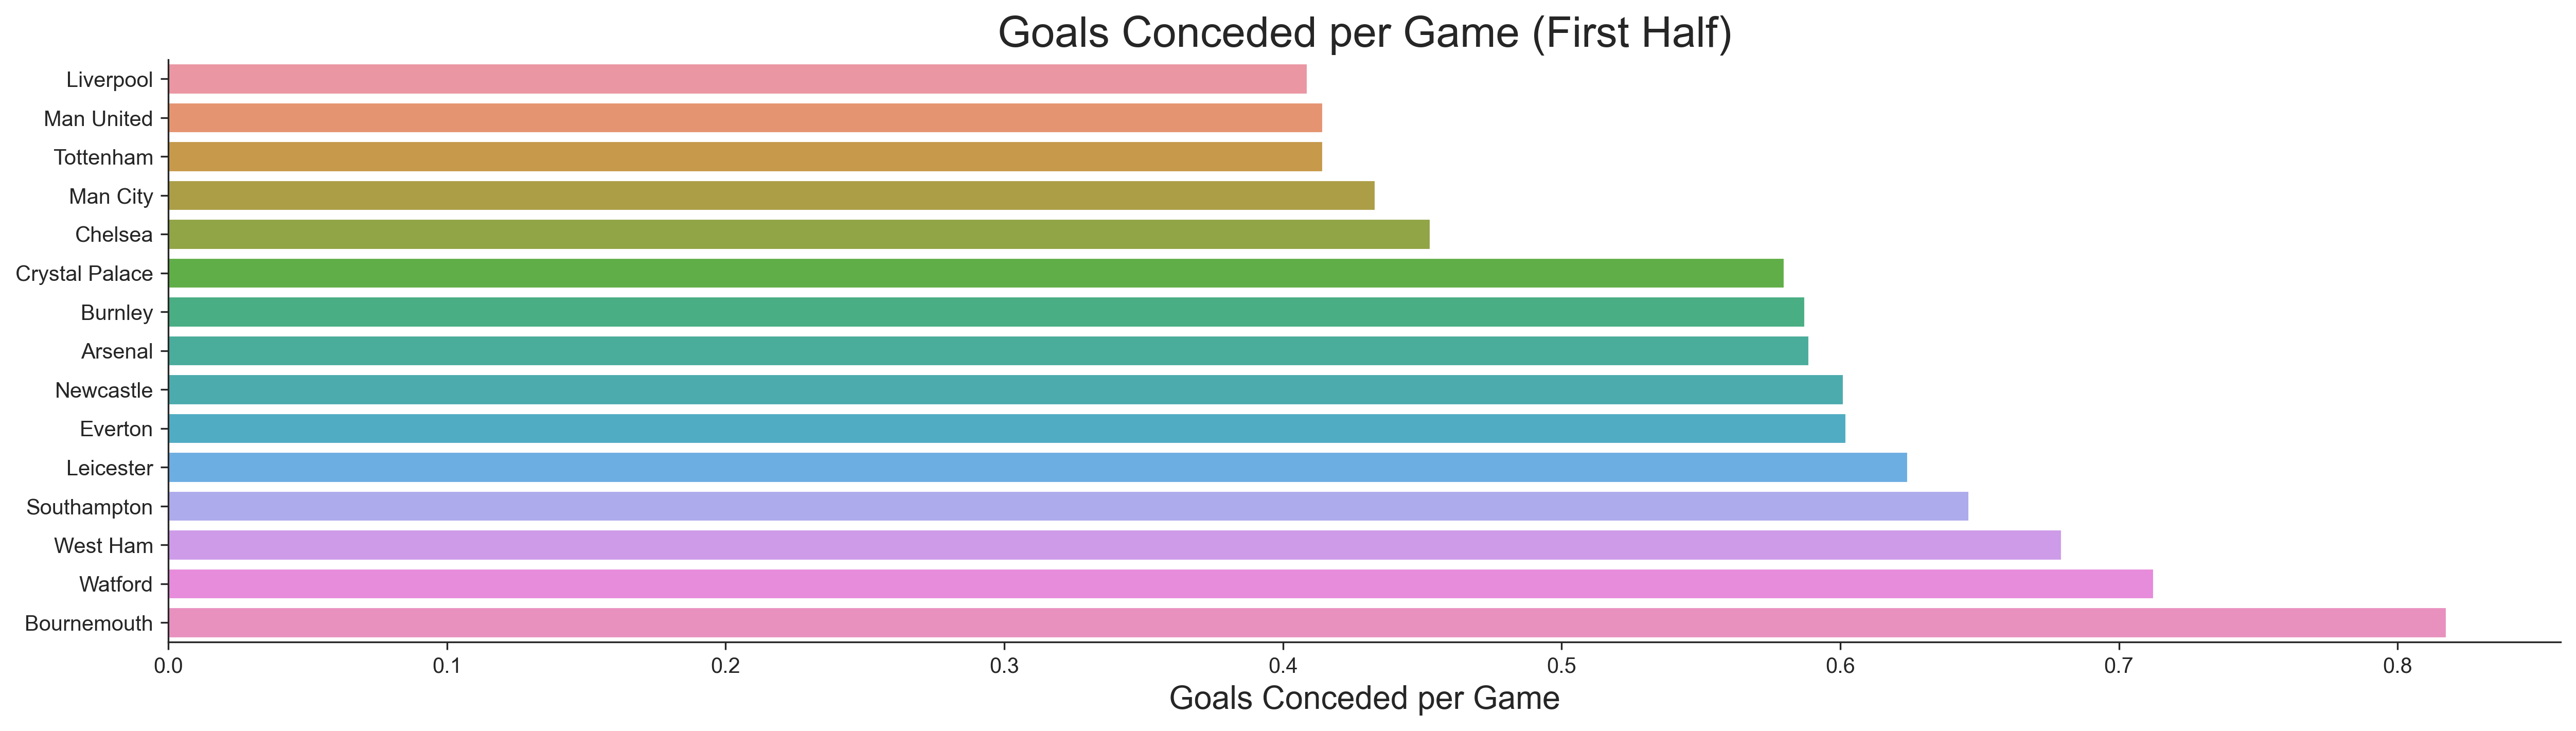

In [230]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_conceded_per_game_firsthalf_filter,
           x='goals_conceded_per_game_firsthalf',
           y='team')
plt.xlabel('Goals Conceded per Game', fontsize=15)
plt.ylabel('')
plt.title('Goals Conceded per Game (First Half)', fontsize=20)
sns.despine(top=True);

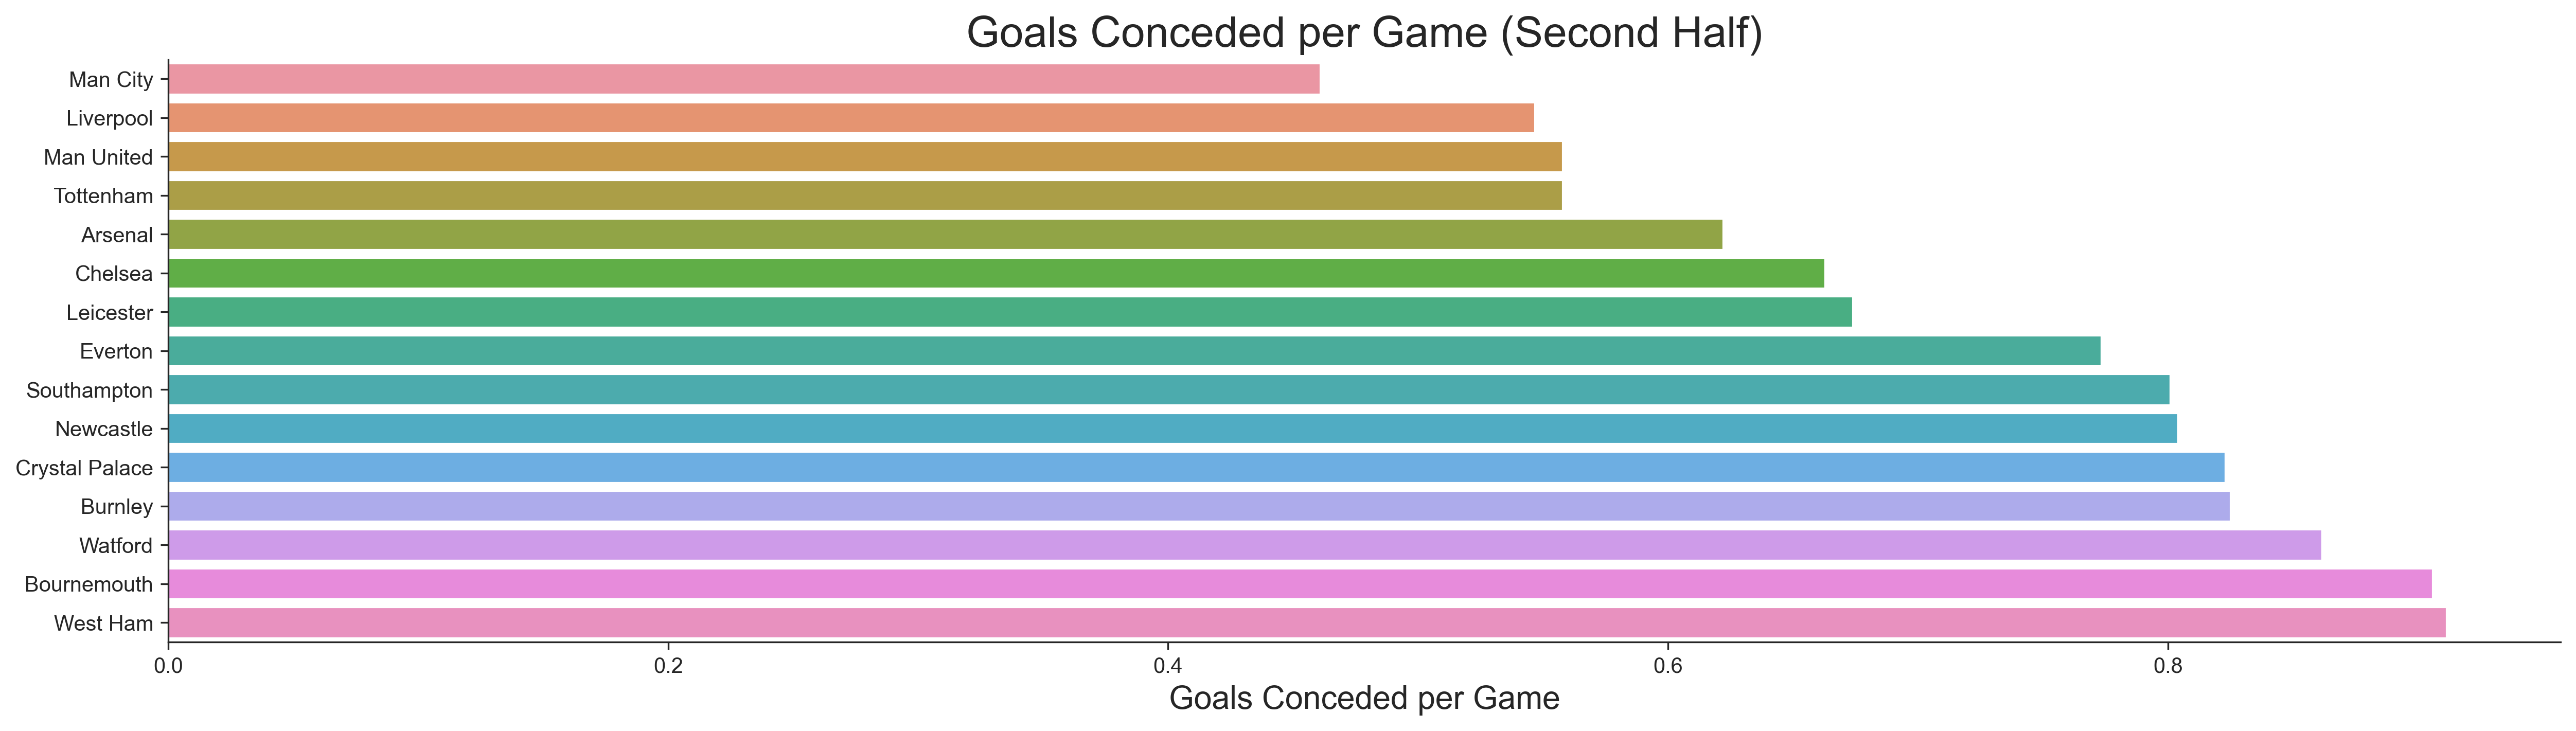

In [231]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_goals_conceded_per_game_secondhalf_filter,
           x='goals_conceded_per_game_secondhalf',
           y='team')
plt.xlabel('Goals Conceded per Game', fontsize=15)
plt.ylabel('')
plt.title('Goals Conceded per Game (Second Half)', fontsize=20)
sns.despine(top=True);

In [239]:
df.head()

,date,home_team,away_team,ht_score,ft_score,firsthalf_home_goals,firsthalf_away_goals,secondhalf_home_goals,secondhalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,secondhalf_result,result
0,Sat Aug 8 2015,Bournemouth,Aston Villa,0-0,0-1,0,0,0,1,0,1,Draw,Aston Villa,Aston Villa
1,Sat Aug 8 2015,Chelsea,Swansea,2-1,2-2,2,1,0,1,2,2,Chelsea,Swansea,Draw
2,Sat Aug 8 2015,Everton,Watford,0-1,2-2,0,1,2,1,2,2,Watford,Everton,Draw
3,Sat Aug 8 2015,Leicester,Sunderland,3-0,4-2,3,0,1,2,4,2,Leicester,Sunderland,Leicester
4,Sat Aug 8 2015,Man United,Tottenham,1-0,1-0,1,0,0,0,1,0,Man United,Draw,Man United


In [254]:
clean_sheet_home_filter = df[df['total_away_goals']==0]
df_clean_sheet_home = pd.DataFrame({'clean_sheets_home' : clean_sheet_home_filter["home_team"].value_counts()}).reset_index()
df_clean_sheet_home_top10 = df_clean_sheet_home[:10]
df_clean_sheet_home_top10

,index,clean_sheets_home
0,Liverpool,41
1,Man United,40
2,Tottenham,40
3,Arsenal,39
4,Chelsea,36
5,Man City,33
6,Leicester,33
7,Everton,32
8,Watford,29
9,West Ham,28


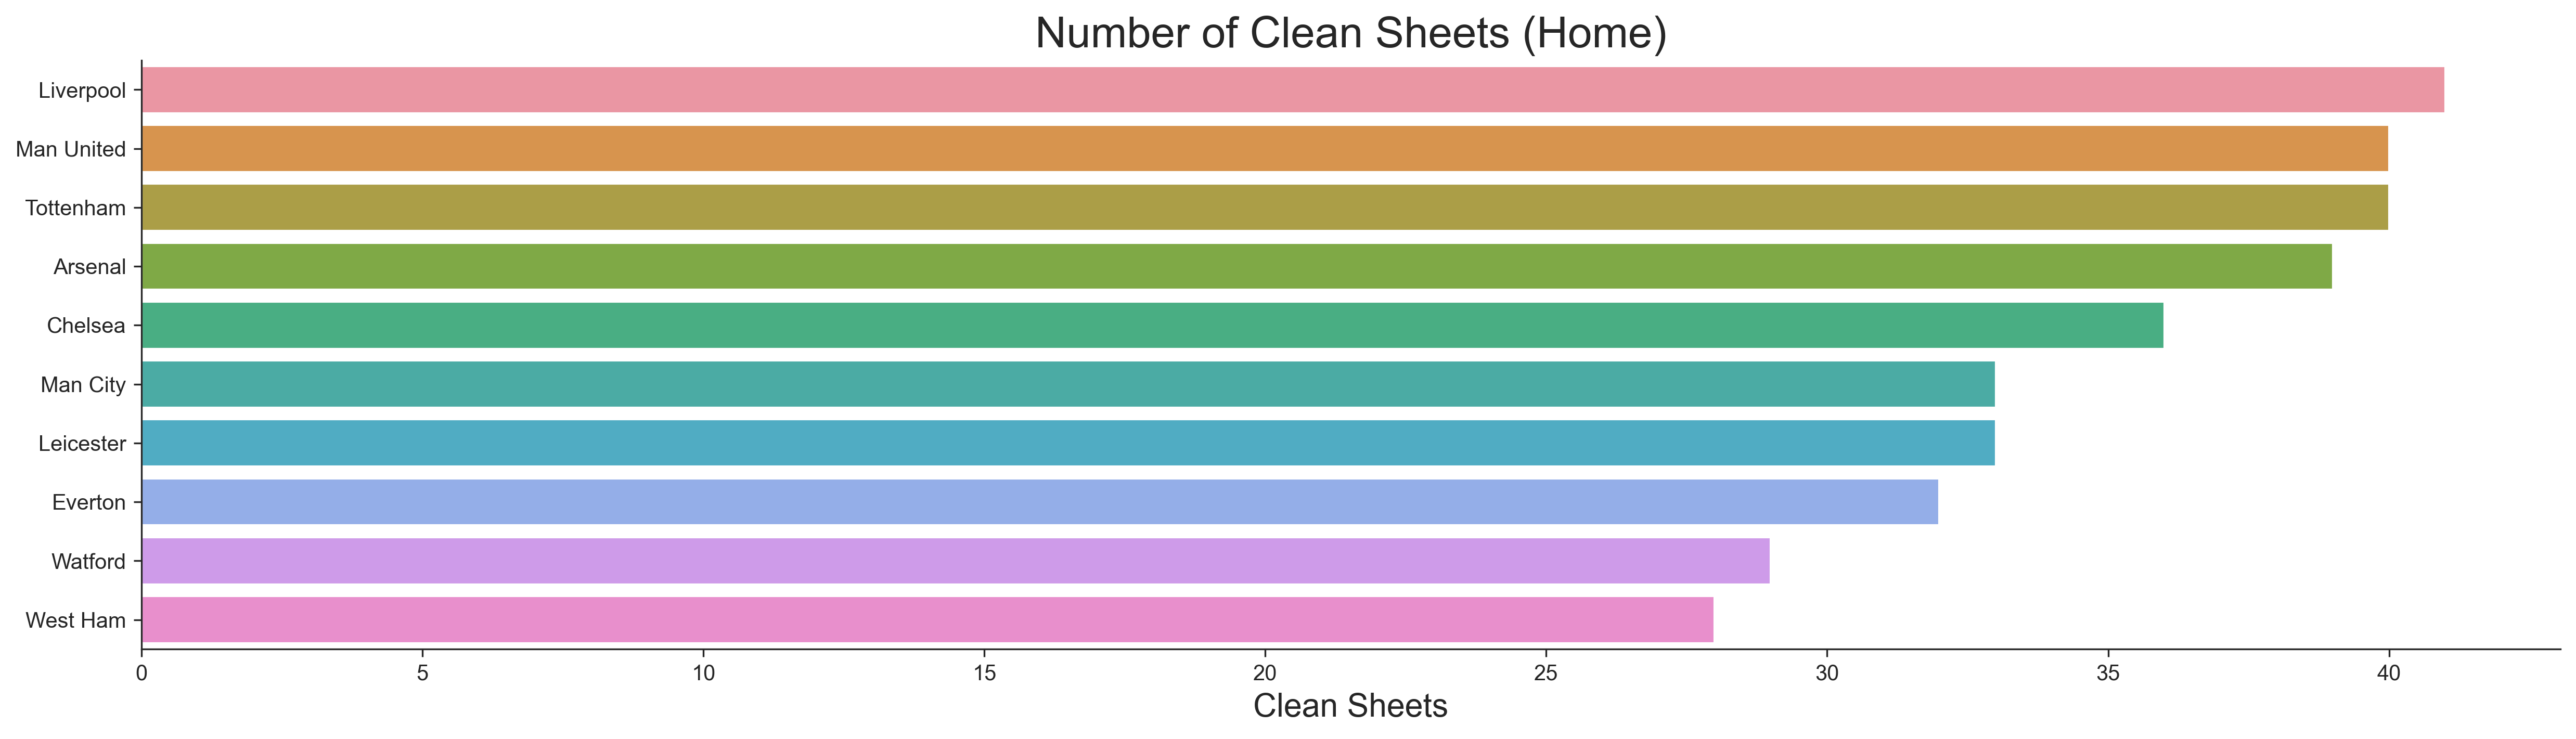

In [255]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_clean_sheet_home_top10,
           x='clean_sheets_home',
           y='index')
plt.xlabel('Clean Sheets', fontsize=15)
plt.ylabel('')
plt.title('Number of Clean Sheets (Home)', fontsize=20)
sns.despine(top=True);

In [256]:
clean_sheet_away_filter = df[df['total_home_goals']==0]
df_clean_sheet_away = pd.DataFrame({'clean_sheets_away' : clean_sheet_away_filter["away_team"].value_counts()}).reset_index()
df_clean_sheet_away_top10 = df_clean_sheet_away[:10]
df_clean_sheet_away_top10

,index,clean_sheets_away
0,Man City,43
1,Liverpool,32
2,Man United,29
3,Chelsea,27
4,Southampton,25
5,Tottenham,23
6,Everton,21
7,Arsenal,20
8,Leicester,20
9,Crystal Palace,17


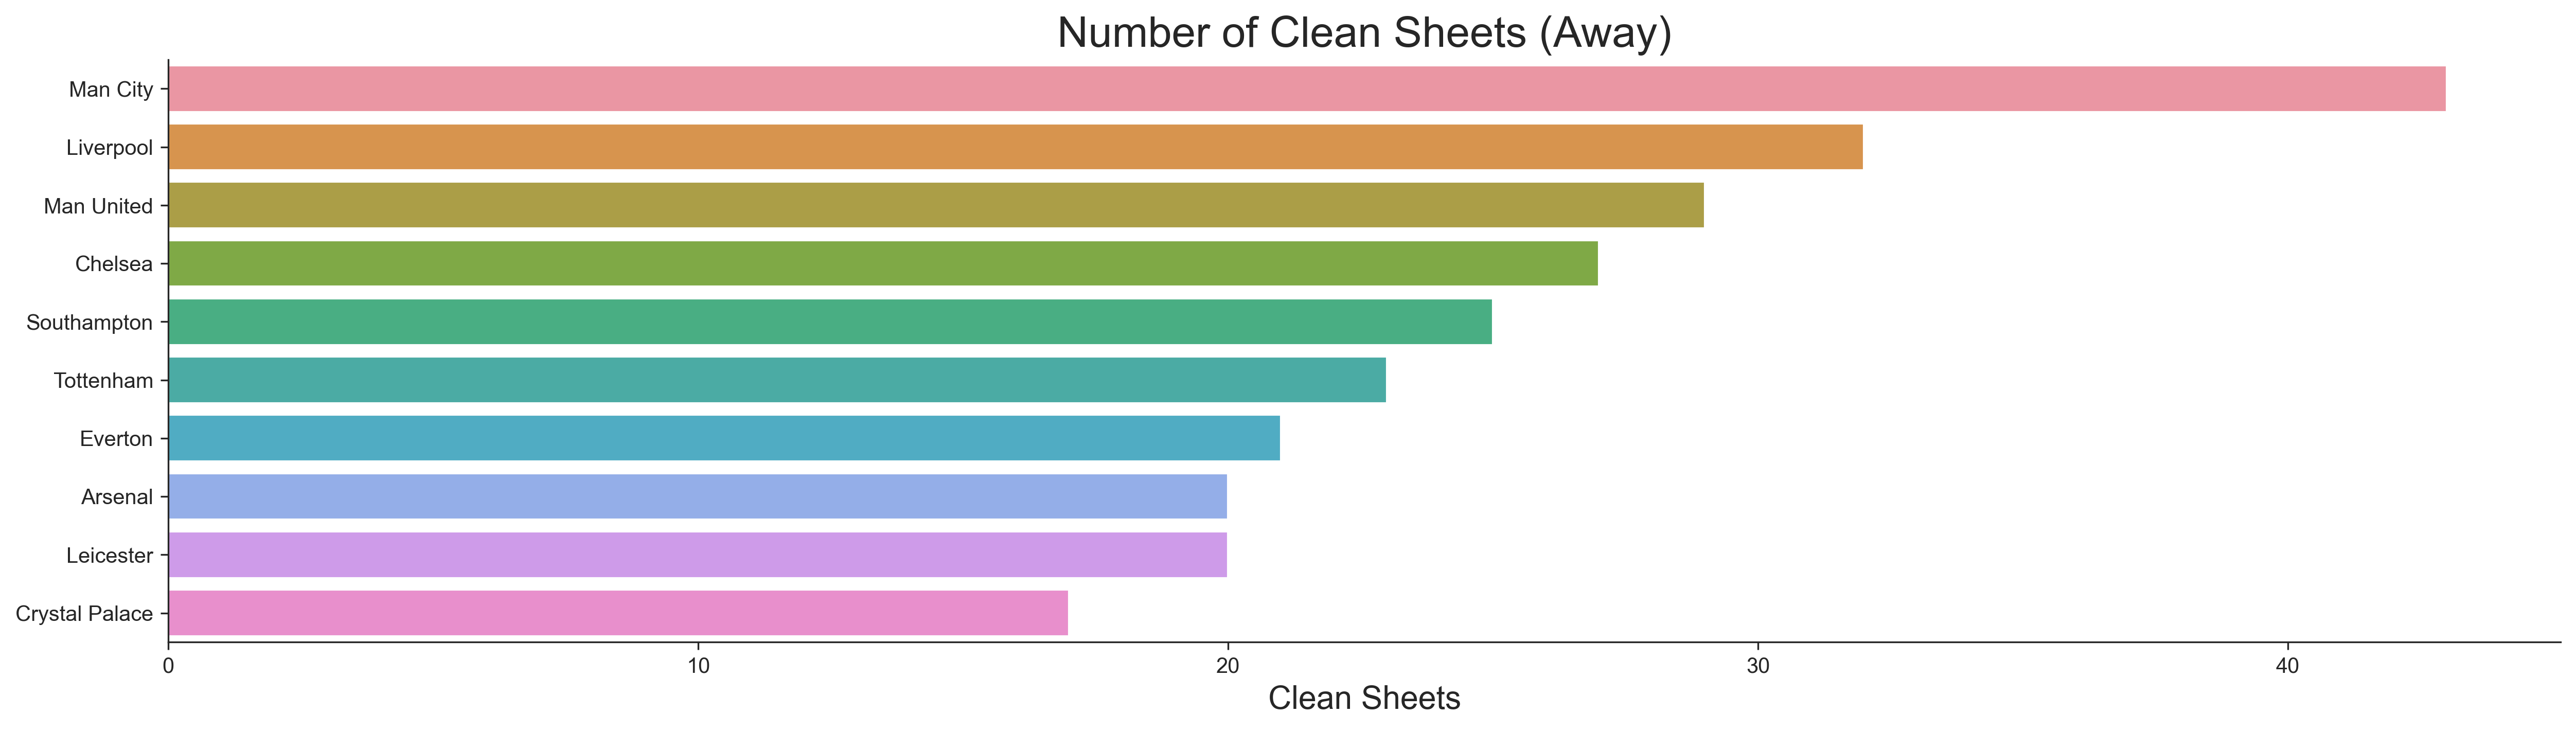

In [257]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_clean_sheet_away_top10,
           x='clean_sheets_away',
           y='index')
plt.xlabel('Clean Sheets', fontsize=15)
plt.ylabel('')
plt.title('Number of Clean Sheets (Away)', fontsize=20)
sns.despine(top=True);

In [275]:
df_total_clean_sheets = df_clean_sheet_away.merge(right=df_clean_sheet_home, on='index')
df_total_clean_sheets['total_clean_sheets'] = df_total_clean_sheets['clean_sheets_away'] + df_total_clean_sheets['clean_sheets_home']
df_total_clean_sheets = df_total_clean_sheets.drop(columns=['clean_sheets_away', 'clean_sheets_home'])
df_total_clean_sheets = df_total_clean_sheets.sort_values(by='total_clean_sheets', ascending=False)
df_total_clean_sheets_ = df_total_clean_sheets[:10]
df_total_clean_sheets_

,index,total_clean_sheets
0,Man City,76
1,Liverpool,73
2,Man United,69
3,Chelsea,63
5,Tottenham,63
7,Arsenal,59
6,Everton,53
8,Leicester,53
4,Southampton,47
9,Crystal Palace,45


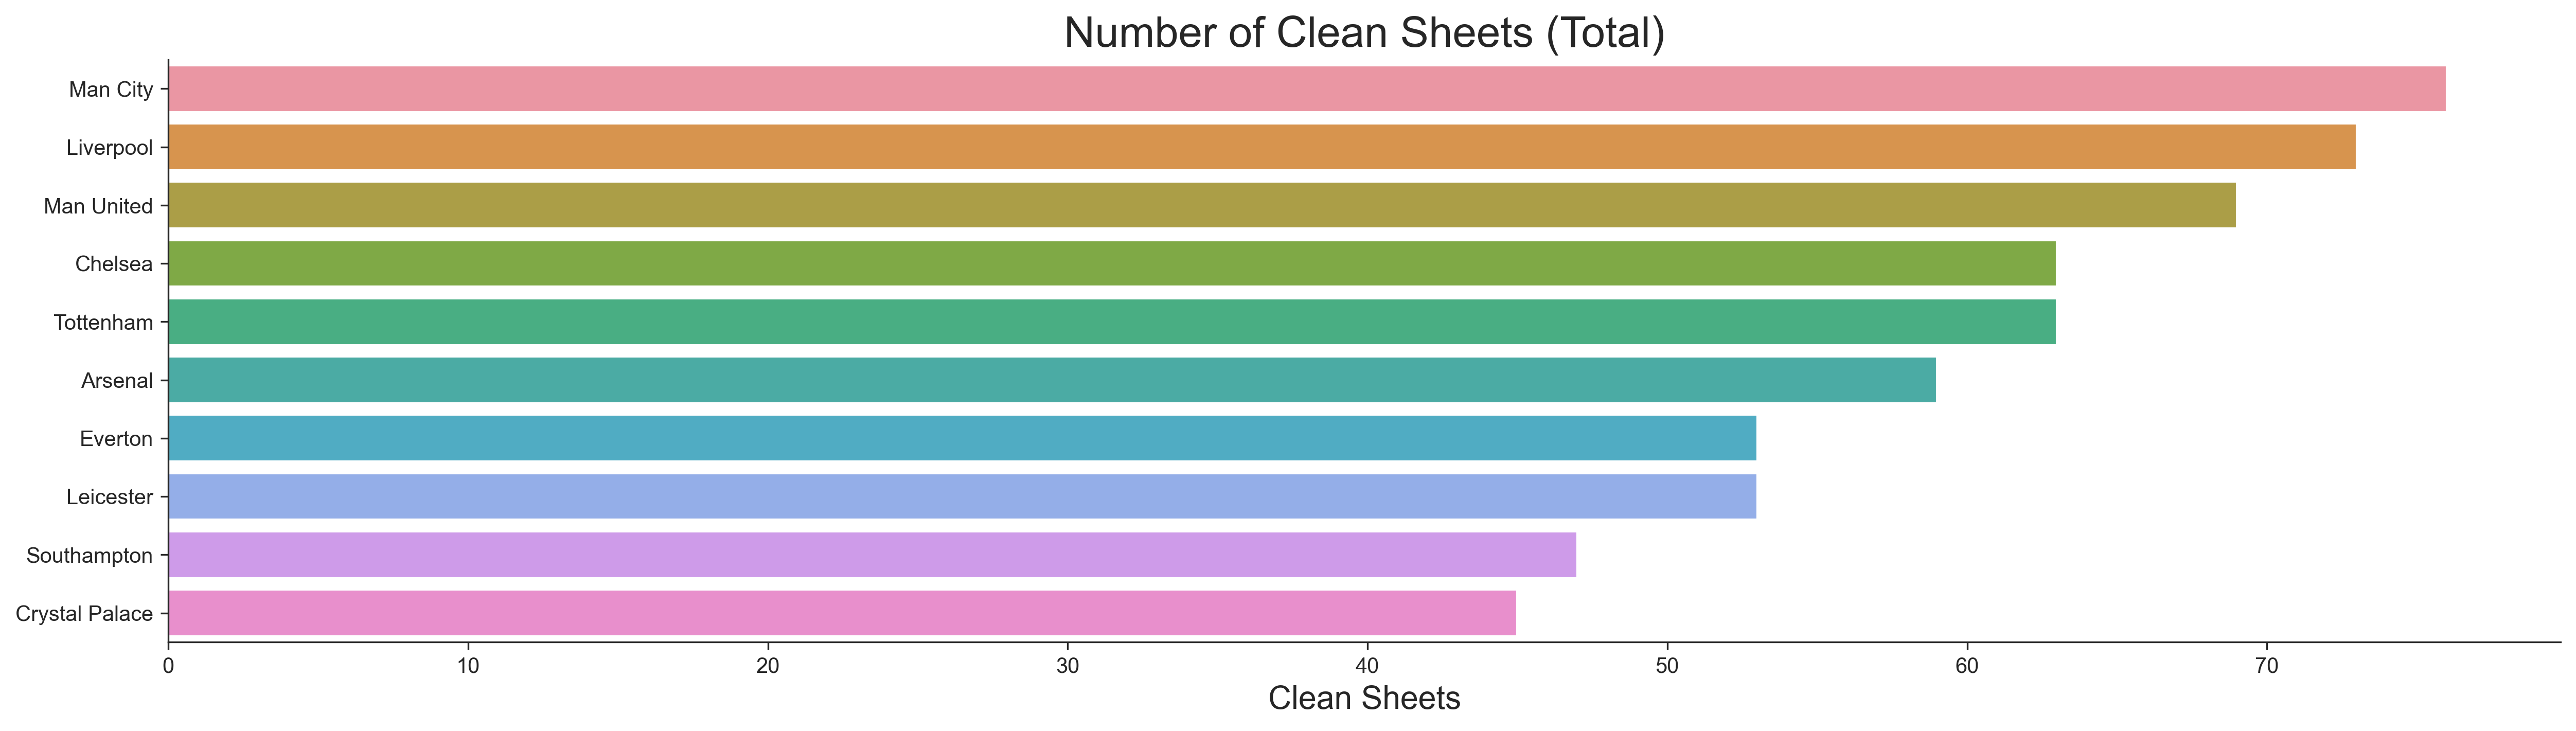

In [276]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_total_clean_sheets_,
           x='total_clean_sheets',
           y='index')
plt.xlabel('Clean Sheets', fontsize=15)
plt.ylabel('')
plt.title('Number of Clean Sheets (Total)', fontsize=20)
sns.despine(top=True);

In [288]:
df_total_clean_sheets.rename(columns={'index': 'team_'}, inplace=True)
df_clean_sheets_per_game = df_total_clean_sheets.merge(right=df_games, on='team_')
df_clean_sheets_per_game = df_clean_sheets_per_game[df_clean_sheets_per_game['games']>=df_clean_sheets_per_game['games'].mean()]
df_clean_sheets_per_game['clean_sheets_per_game'] = df_clean_sheets_per_game['total_clean_sheets'] / df_clean_sheets_per_game['games'] * 100
df_clean_sheets_per_game_ = df_clean_sheets_per_game.sort_values(by='clean_sheets_per_game', ascending=False)
df_clean_sheets_per_game_ = df_clean_sheets_per_game_[:10]
df_clean_sheets_per_game_

,team_,total_clean_sheets,games,clean_sheets_per_game
0,Man City,76,180,42.222222
1,Liverpool,73,181,40.331492
2,Man United,69,181,38.121547
3,Chelsea,63,181,34.806630
4,Tottenham,63,181,34.806630
5,Arsenal,59,180,32.777778
6,Everton,53,181,29.281768
7,Leicester,53,181,29.281768
12,Burnley,41,143,28.671329
8,Southampton,47,181,25.966851


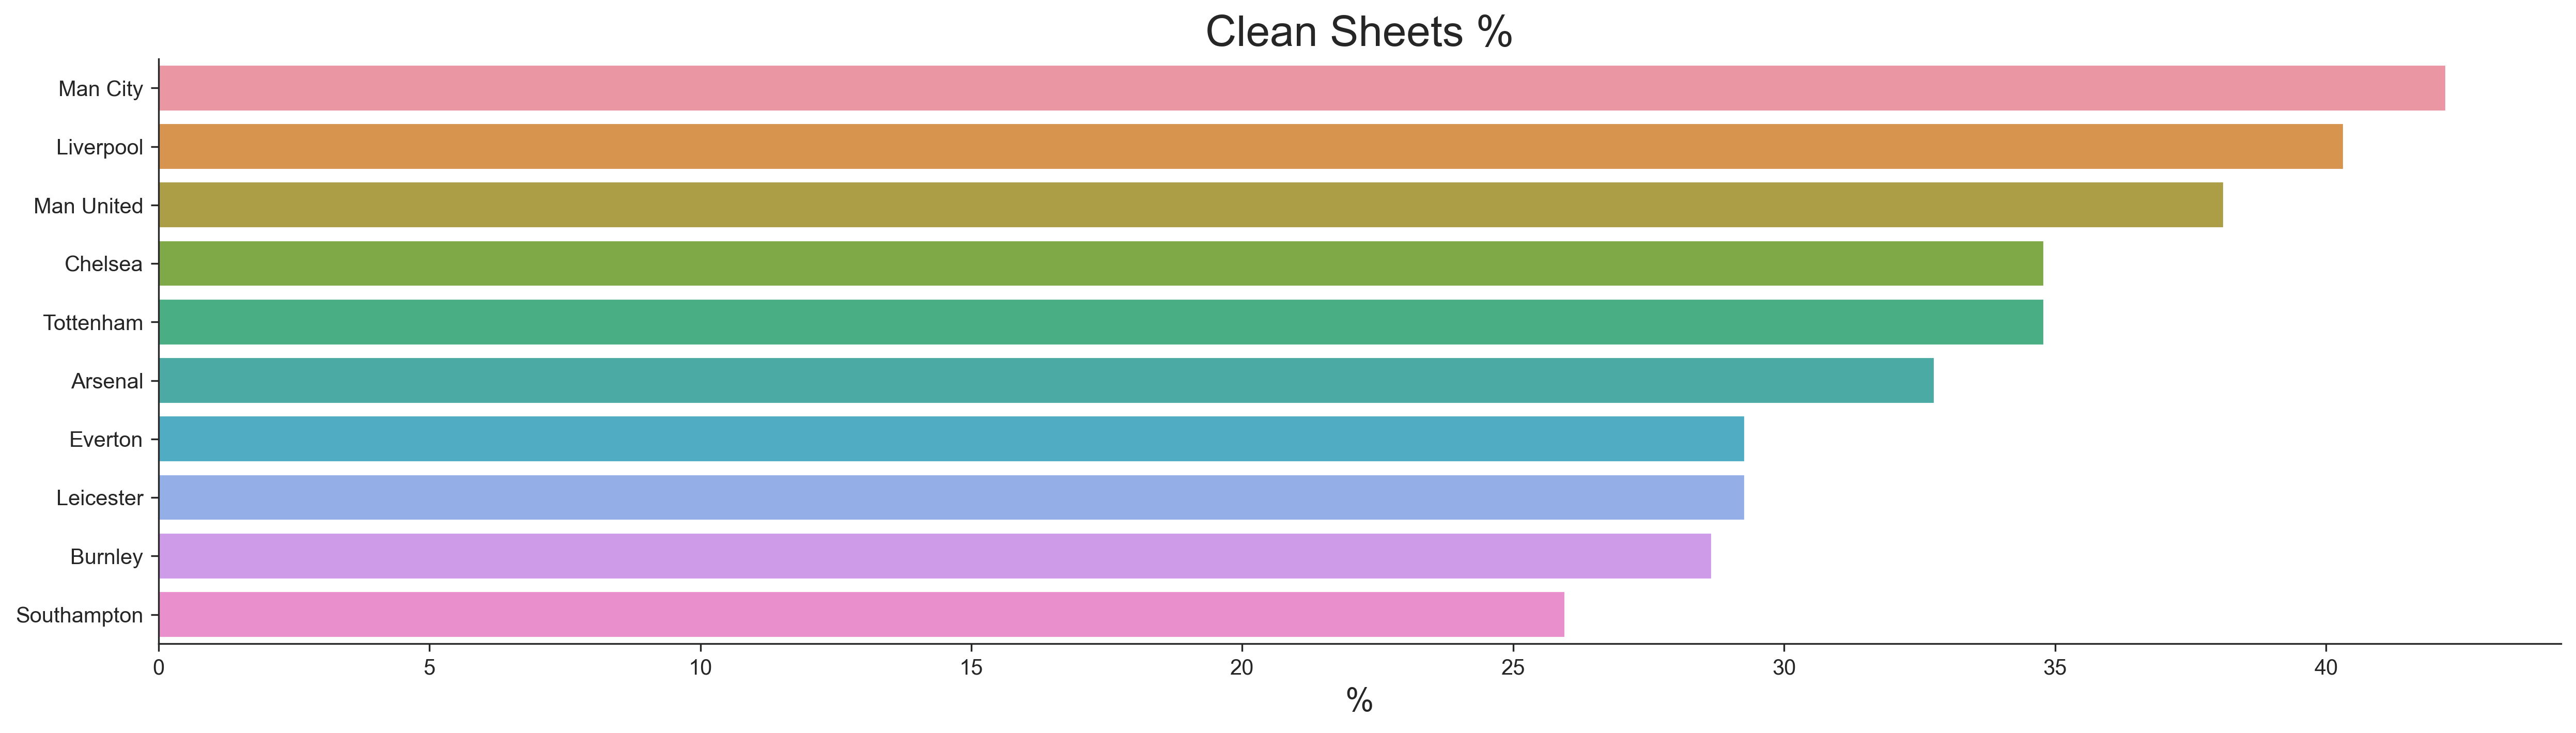

In [289]:
plt.figure(figsize=(20, 5), dpi=300)
sns.barplot(data=df_clean_sheets_per_game_,
           x='clean_sheets_per_game',
           y='team_')
plt.xlabel('%', fontsize=15)
plt.ylabel('')
plt.title('Clean Sheets %', fontsize=20)
sns.despine(top=True);

In [295]:
df_games_ = df_games[df_games['games']>= df_games['games'].mean()]
df_games_

,team_,games
0,Arsenal,180
2,Bournemouth,181
4,Burnley,143
6,Chelsea,181
7,Crystal Palace,181
8,Everton,181
12,Leicester,181
13,Liverpool,181
14,Man City,180
15,Man United,181


In [296]:
df.head()

,date,home_team,away_team,ht_score,ft_score,firsthalf_home_goals,firsthalf_away_goals,secondhalf_home_goals,secondhalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,secondhalf_result,result
0,Sat Aug 8 2015,Bournemouth,Aston Villa,0-0,0-1,0,0,0,1,0,1,Draw,Aston Villa,Aston Villa
1,Sat Aug 8 2015,Chelsea,Swansea,2-1,2-2,2,1,0,1,2,2,Chelsea,Swansea,Draw
2,Sat Aug 8 2015,Everton,Watford,0-1,2-2,0,1,2,1,2,2,Watford,Everton,Draw
3,Sat Aug 8 2015,Leicester,Sunderland,3-0,4-2,3,0,1,2,4,2,Leicester,Sunderland,Leicester
4,Sat Aug 8 2015,Man United,Tottenham,1-0,1-0,1,0,0,0,1,0,Man United,Draw,Man United


In [307]:
df_won = pd.DataFrame({'won' : df['result'].value_counts()}).reset_index()
df_won = df_won.drop([0])
df_won = df_won.rename(columns={'index': 'team_'})
df_won

,team_,won
1,Man City,124
2,Liverpool,116
3,Tottenham,102
4,Chelsea,98
5,Man United,93
6,Arsenal,92
7,Leicester,78
8,Everton,66
9,West Ham,60
10,Crystal Palace,58


In [373]:
df_table = df_games.copy()
df_table = df_table.merge(right=df_won, on='team_')
df_table

,team_,games,won
0,Arsenal,180,92
1,Aston Villa,66,10
2,Bournemouth,181,54
3,Brighton,105,24
4,Burnley,143,47
5,Cardiff,38,10
6,Chelsea,181,98
7,Crystal Palace,181,58
8,Everton,181,66
9,Fulham,38,7


In [374]:
draw_filter = df[df['result'] == 'Draw']
df_draw_home = pd.DataFrame({'draw_home' : draw_filter['home_team'].value_counts()}).reset_index()
df_draw_away = pd.DataFrame({'draw_away' : draw_filter['away_team'].value_counts()}).reset_index()

df_draw = df_draw_home.merge(right=df_draw_away, on='index')
df_draw['drew'] = df_draw['draw_home'] + df_draw['draw_away']
df_draw = df_draw.drop(columns=['draw_home', 'draw_away'])
df_draw = df_draw.rename(columns={'index': 'team_'})
df_draw

,team_,drew
0,Man United,48
1,Southampton,50
2,Watford,41
3,Bournemouth,42
4,West Ham,48
5,Liverpool,42
6,Chelsea,39
7,Leicester,43
8,Everton,50
9,Crystal Palace,41


In [375]:
df_table = df_table.merge(right=df_draw, on='team_')

In [376]:
df_table['lost'] = df_table['games'] - df_table['won'] - df_table['drew']

In [377]:
df_table['points'] = (df_table['won'] * 3) + (df_table['drew'])

In [378]:
df_table = df_table.sort_values(by='points', ascending=False)
df_table.rename(columns={'team_': 'team'}, inplace=True)
df_table['pos'] = range(1,len(df_table)+1)
df_table = df_table[['pos', 'team', 'games', 'won', 'drew', 'lost', 'points']]

,pos,team,games,won,drew,lost,points
14,1,Man City,180,124,27,29,399
13,2,Liverpool,181,116,42,23,390
24,3,Tottenham,181,102,39,40,345
6,4,Chelsea,181,98,39,44,333
15,5,Man United,181,93,48,40,327
0,6,Arsenal,180,92,43,45,319
12,7,Leicester,181,78,43,60,277
8,8,Everton,181,66,50,65,248
27,9,West Ham,181,60,48,73,228
20,10,Southampton,181,56,50,75,218


In [381]:
df_table = df_table.merge(right=df_goals_scored, on='team')

In [383]:
df_table = df_table.merge(right=df_goals_conceded_scored, on='team')

In [385]:
df_table['gd'] = df_table['goals'] - df_table['goals_conceded']

In [399]:
df_table.rename(columns={'pos': 'Pos',
                         'team': 'Club',
                         'games': 'MP',
                         'won': 'W',
                         'drew': 'D',
                         'lost': 'L',
                         'points': 'Pts',
                         'goals': 'GF',
                         'goals_conceded': 'GA',
                         'gd': 'GD'}, inplace=True)

In [400]:
df_table = df_table[['Pos', 'Club', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

In [401]:
df_table

,Pos,Club,MP,W,D,L,GF,GA,GD,Pts
0,1,Man City,180,124,27,29,420,161,259,399
1,2,Liverpool,181,116,42,23,380,173,207,390
2,3,Tottenham,181,102,39,40,343,176,167,345
3,4,Chelsea,181,98,39,44,320,202,118,333
4,5,Man United,181,93,48,40,280,176,104,327
5,6,Arsenal,180,92,43,45,329,218,111,319
6,7,Leicester,181,78,43,60,281,235,46,277
7,8,Everton,181,66,50,65,256,249,7,248
8,9,West Ham,181,60,48,73,247,288,-41,228
9,10,Southampton,181,56,50,75,217,262,-45,218
